###  Master's Thesis Code - The Speculum Scribe's copy of the Middle Dutch translation of the four gospels: A computational comparison of Vienna, ÖNB, SN, 12.857 and its potential exemplars - Anouck Kuypers

In [1]:
#!pip install matplotlib==3.7.1

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import numpy as np
from tqdm import tqdm
import pandas as pd   #version '1.3.5'
np.random.seed(123123)

In [3]:
import matplotlib
print(matplotlib.__version__)

3.7.1


 ### 1. Filtering 

The main goal of this master's thesis is to uncover *if* the Speculum Scribe utilised both Saint Petersburg, BAN, O 256 and Brussels, KBR, 2979 to create Vienna, ÖNB, SN 12.857, and *how* he used his exemplars. All three manuscripts contain the Middle Dutch translation of the four gospels. The corpus consists of plain text files. For every manuscript (Saint Petersburg, BAN, O 256, Brussels, KBR, 2979 and Vienna ÖNB, SN 12.857) each page is represent by one .txt file that contains the transcription for that page. This makes it very simple to filter out the folia that are not relevent for this research.

Production unit I and III in Vienna, ÖNB, SN 12.857 were not written down by the Speculum Scribe and were likely added in Rooklooster around 1450 to 1500 and circa 1450 respectively, since the hand in both units is younger than the property sign of Rooklooster (Kwakkel, 2002, pp. 275-277). Thus, f. 1r-2r (I, an aid on how one should read the gospels) and f. 11r-18r (III, a second set of pericope lists) will be excluded. Aditionally, the text files containing the pericope lists will be removed from all manuscripts since they are not relevant for this research and differ extremely between manuscripts. Folia containing only property marks or library signatures will be removed as well from all three manuscripts. Lastly, due to a binding error, the first production unit in Brussels, KBR, 2979 appears after the first quire of the second production unit. So, the filenames for f. 9r-16v and 1r-8v should be swapped to appear in the intended order and to match the content order of the other two manuscripts. Since this is such a small amount of folia, the filenames have been manually changed prior to loading the files. The text files can now be loaded and combined into one big text file for each manuscript.

In [4]:
#Brussels, KBR, 2979 
text_BR = ''
to_remove_BR = ['005','008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', 343, 344] 
#it is not a problem if empty pages are not excluded, they will be removed during preprocessing anyway
files = os.scandir('dataset/Brussel,_KBR,_2979/txt files')

for file in files:
    #print(file.name)
    if any( '_'+str(nr)+'_' in file.name for nr in to_remove_BR):
        print(file.name)
        continue
    else:
        #print(file.name)
        with open(file.path, 'r', encoding='utf-8') as f:
            text_BR += f.read() + '\n'
                
with open("Output_KBR.txt", "w", encoding='utf-8') as text_file:
    text_file.write(text_BR)
        
#Saint Petersburg, BAN, O 256
text_SP = ''
to_remove_SP = ['003', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', 214]
files = os.scandir('dataset/Sint-Petersburg,_BAN,_O_256_-_Copy_-_text_recognition_with_v1_2_4/txt files')

for file in files:
    #print(file.name)
    if any( '_'+str(nr)+'.' in file.name for nr in to_remove_SP):
        print(file.name)
        continue
    else:
        #print(file.name)
        with open(file.path, 'r', encoding='utf-8') as f:
            SP_text = f.read()
            
            #In text file 0015_O. 256_015.txt, only a portion of the text is from the pericope lists. Only this text will be skipped
            if file.name == '0015_O. 256_015.txt':
                print(file.name)
                SP_text = SP_text.replace('''E nedʼ gaende .
Op alre heilighē . dʼ mᵗ .v.
E siende ihesus de scaren .
Op alre sielen dach . mᵗ .xxv.
E asse smenschen sone
Sʼ seuerus e andʼe mᵗ .xxiiij.
E sittende op
Sʼ theodorꝰ dach . mᵗ .xvj.
Soe wie na mi comen wilt .
Sʼ mʼtens dach . mᵗ .xxv.
Want alsoe een mensche .
Sʼ elizabetten dach mᵗ xiij.
Dat rikē dʼ he . es ghelike dē ꝟbor
Sʼ ceciliē dʼ . mᵗ .xxv.
Vʼandē x magheden .
Sʼ clements . dʼ lu .xix.
Erande edel mensche .
Sente katelinē dʼ . mᵗ .xxv.
Vandē . .x. magheden
''', '')
                #print(SP_text)
            text_SP += SP_text + '\n'
                
with open("Output_SP.txt", "w", encoding='utf-8') as text_file:
    text_file.write(text_SP)

#Vienna, ÖNB, SN 12.857
text_Vien = '' 
to_remove_Vien = ['001', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '494']
files = os.scandir('dataset/Wenen, ÖNB, 12.857/txt files')

for file in files:
    #print(file.name)
    if any( str(nr)+'.' in file.name for nr in to_remove_Vien):
        print(file.name)
        continue
    else:
        #print(file.name)
        with open(file.path, 'r', encoding='utf-8') as f:
            text_Vien += f.read() + '\n'
                
with open("Output_Vien.txt", "w", encoding='utf-8') as text_file:
    text_file.write(text_Vien)

0005_005_KBR2979_Ir.txt
0008_008_KBR2979_IIv.txt
0009_009_KBR2979_9r.txt
0010_010_KBR2979_9v.txt
0011_011_KBR2979_10r.txt
0012_012_KBR2979_10v.txt
0013_013_KBR2979_11r.txt
0014_014_KBR2979_11v.txt
0015_015_KBR2979_12r.txt
0016_016_KBR2979_12v.txt
0017_017_KBR2979_13r.txt
0018_018_KBR2979_13v.txt
0019_019_KBR2979_14r.txt
0020_020_KBR2979_14v.txt
0021_021_KBR2979_15r.txt
0022_022_KBR2979_15v.txt
0023_023_KBR2979_16r.txt
0024_024_KBR2979_16v.txt
0343_343_KBR2979_168r.txt
0344_344_KBR2979_168v.txt
0003_O. 256_003.txt
0005_O. 256_005.txt
0006_O. 256_006.txt
0007_O. 256_007.txt
0008_O. 256_008.txt
0009_O. 256_009.txt
0010_O. 256_010.txt
0011_O. 256_011.txt
0012_O. 256_012.txt
0013_O. 256_013.txt
0014_O. 256_014.txt
0015_O. 256_015.txt
0214_O. 256_214.txt
0001_00000001.txt
0013_00000013.txt
0014_00000014.txt
0015_00000015.txt
0016_00000016.txt
0017_00000017.txt
0018_00000018.txt
0019_00000019.txt
0020_00000020.txt
0021_00000021.txt
0022_00000022.txt
0023_00000023.txt
0024_00000024.txt
0025_00

The majority of the code from this point onward was used for *From exemplar to copy: the scribal appropriation of a Hadewijch
 manuscript computationally explored* by Wouter Haverals and Mike Kestemont (2023). Their notebook can be downloaded from the following GitHub repository: https://github.com/WHaverals/hadewijch-scribes.
The code has been modified, or slightly expanded upon, when necessary for the current research.

### 2. Text preprocessing

In [4]:
# simple text preprocessing, splitting tokens on whitespace and rejoining hyphenated words

def preprocess_txt(path):
    with open(path, encoding='utf-8') as f:
        text = f.read()
        text = text.replace('-\n', '') #hyphen followed by newline
        text = text.replace('- \n', '')  #hyphen followed by space and newline (just in case)
        text = [' '.join(text.split())]
    return text

# alignment algortihm is computationally very demanding, so: feed text chunks no larger than 50kb 
B = preprocess_txt('Output_KBR.txt')
SP = preprocess_txt('Output_SP.txt')
V = preprocess_txt('Output_Vien.txt')

In [5]:
print(B)
print(len(B))  #a list that contains the text. This needs to be divided into chunks, otherwise the alignment algorithm will crash.

['Hier beghīnē dewāgelien die sente Matheus bescrijft d Dat dʼ ghebortē ihʼu x\ue665i dauids sone Abᵃhās sone . Abᵃhā ghebaer ysaac Vsaac ghebaer iacop . Jacop gheba mudā e\ue5dc ssine bᵒedʼe . Judas ghebaer phares e\ue5dc zarā vā thamar . Vhares ghebaer esrō . Esro ghebaʼ arā Arā ghebaʼ amnadap . Ammadarp ghebaᵉ naasō Nason ghebaer salmō Salmō ghebaʼ boꝫ vā raab . Boos ghebaer olech ute ruch . Olech gheba iesse Desse ghebaᵉ dē conīc d Oauid de . coghebaer salamone ute hare di was vrie . Salamoe ghebaʼ tovyā . Holoa ghebaʼ abiā . Abia ghebe ara . Hza ghebaer iosaphat Josaphat ghebaʼ iorā Horā ghebaʼ osyā . Ohia ghebier ioathan Joathā gheva achaz . Achaꝫ ghebaer ezechiā . Ezechiā ghebaʼ manassen Manassēs ghebaʼ amō . Amō ghebaʼ iosyam . Josyas ghebaʼ iochoīā . e\ue5dc sine bᵒedē ī de ouʼvaʼe vā babilonye E\ue5dc na de ouʼvaʼt vā babilome gebaer iechōias salachrel . Salachiel gheba robabel . Zorobabel ghebaʼ abyudʼ Abyud ghebaer elyachī . Elyachi . ghebaʼ azoe . Azor ghebaʼ sa daech . Sa

### 3. Performing alignment (at word-level) with Needleman-Wunsch algorithm <a name='alignment'/>

The Needleman-Wunsch algorithm was applied to VIENNA, ÖNB, SN, 12.857 and SAINT PETERSBURG, BAN, O 256 as well as VIENNA, ÖNB, SN, 12.857 and BRUSSELS, KBR, 2979 to create two pairwise sequence alignments at the word-level. The Python library by Folgert Karsdorp was used to apply the Needleman-Wunsch algorithm to the manuscripts, which can be downloaded here:
https://github.com/fbkarsdorp/alignment

The reason for aligning the manuscripts before segmenting them, is to ensure that the content of all the segments in a manuscript pair matches. Simply selecting a set amount of sentences would results in a mismatch between the sequences since the manuscripts are not identical. 

The alignment algorithm is so computationally demanding that applying it to the entire files at once would result in a MemoryError. First, the text needs to be divided into chunks which will subsequently be aligned. However, the text cannot be divided simply based on kB size or amount of sentences since the manuscripts are not the same length. Otherwise the chunks cannot be properly aligned since they would not contain the same content.

Therefore, I will manually select where each chunk of the Viennese manuscript will begin and end. The matching sentences will be selected for the Brussels and Saint Petersburg manunscript. The function below will perform the chunking based on this info. The sentence boundaries were decided based on 50 kB chunks I had made to ensure that the chunks would not be too big. 

In [6]:
def read_text_in_chunks_from_list(text_list, barriers_of_chunks):
    text = text_list[0]  #the text of the manuscript
    
    nr = 0
    #print(len(barriers_of_chunks))
    while nr < len(barriers_of_chunks) - 2:  #-2 instead of -1 because for the last chunk the end boundary needs to be included
        start = barriers_of_chunks[nr]
        end = barriers_of_chunks[nr + 1]
        
        #find starting index for the chunk boundaries
        start_idx = text.find(start)
        end_idx = text.find(end)
        
        if start_idx != -1 and end_idx != -1:
            chunk = text[start_idx:end_idx] #select a chunk from the text based on the sentence boundaries (end_idx not included!)
            yield chunk  #yield the chunk
            
            #now start the text at end_idx to be certain that possible duplicate sentences in the manuscript do not cause issues
            #during chunking
            text = text[end_idx:]
        
        else:
            print(f"Could not find sentences: {start} or {end}!")
        
        nr += 1  #move to the next sentence pair
        
    #For the very last chunk, the end sentence boundary needs to be included!
    if nr == len(barriers_of_chunks) - 2:
        start = barriers_of_chunks[nr]
        end = barriers_of_chunks[nr+1]
        
        start_idx = text.find(start)
        end_idx = text.find(end)
        
        if start_idx != -1 and end_idx != -1:
            chunk = text[start_idx:end_idx + len(end)]  #add len(end) to include the end boundary!!
            yield chunk  #yield the last chunk
        else:
            print(f"Could not find sentences: {start} or {end}!")

Chunking Vienna, ÖNB, SN 12.857:

In [7]:
barriers_of_chunks_V = ['''m .xjo Hier beghent sente matheꝰ BMwoec der gheboerten ewāgelie .i.''',
                        '''De qᵃde gheboerte e de hoer doemeghe soeket .i. tekē e hare en wʼdꝫ gheen tekē ghegheuē dan ionas tekē dies prophetē . Wāt alsoe ionas drie daghe e .iij. nachte was ī dē buc dies walueschs alsoe sal smēsche so xxim D Maʼ ne si ī thʼte dʼ erdē .iij. daghe e . iij nachte''', 
                        '''E die enen ōtfaen hadde wech gaende groefhine ī de erde e barch sis herē ghelt''',
                        '''Ganc achtʼ mi sathanas wāt du ē smaecs nᵗ die dīc de welke gods si maer welke dʼ mēschē si''',
                        '''Niemene ē seldi vʼduwē noch op loep doē . e laet u genoeghē mꝫ uwē soute''',
                        '''E wꝫ dat wel wiste die vadʼ dʼ familien te wat uren die dief comē soude . hi soude wakē . e hi ē liete nᵗ si huus ondʼgrauē''',
                        '''E hi seide te hen . Wat sijn de redenē die ghi spᵉct ondʼlīghe ende ghi sijt droeue''',
                        '''Si seide hē trouwen here ic heb begheloeuꝫ wat du bes xs gods sone die comē sijt ī dese wʼelt''',
                        '''Jc wa ne de werelt niet begripen ē soude de boeke welke te scriuene sijn ''']  

In [8]:
#This is to check if the chunking worked correctly
cnt=0
lengths = 0
for match in list(read_text_in_chunks_from_list(V, barriers_of_chunks_V)):
    cnt+=1
    lengths += len(match)
    print(len(match), f'HERE IS MATCH nr {cnt} OF 8', match)
print(lengths) #385918
print(len(V[0])) #385918

40630 HERE IS MATCH nr 1 OF 8 m .xjo Hier beghent sente matheꝰ BMwoec der gheboerten ewāgelie .i. shesu xi dauids sone . Abrahās sone . Abrahā wan ysaac E ysaac wan iacob . E iacob wan indam e sine bruedere . E indas wan phares e zarant vā thamar E phares wā esrom E esrō wā aram . E aram wan aminadab E aminadab wan naasan . E naason wan salms En salmon wan boe vā rach E boor wan obeth vā ruth E obeth wā iessē . E iesse wan dauid den comne E dauid de conīc wā salomone . vā hare die urias wijf was E salomon wan robda E roboam wan abiam E abia wā afa E aza wan iosaphat E iosaphat wan ioram E ioram wan oꝫ yam E oryas wan ioatha E ioathan wan achar E achar wan erecht am E erechias wan manassen E manasses wan amon E amon wan iosyam E iosyas wā iechoniam e sine bruedʼe ī de ouʼwaert vā babylonien . E na de ouʼvaert vā babylonien wan iechomas salathyel E salathyel wā xo .3. 2jt ꝓʼ So .i. .2. .3. de .5. .6.7. .8.9.j .10 .i. .12. .13.e. .55. .ic. kʼs auōt ma roba

Now the same will be done for the other two manuscripts:

In [9]:
barriers_of_chunks_B = ['''Hier beghīnē dewāgelien die sente Matheus bescrijft d Dat dʼ ghebortē''',
                        '''De quade gheboerte e de hoerdoemeghe soeket .i. teken e hare enwerdt ghee tekē ghegeuē dan ionas tekē dies ꝓphetē . Wāt alsoe ionas .ii. daghe e .iij. nachte was ī dē buuc dies waelneschs . alsoe sal sit smēschē sone si ī chʼte dʼ erde .iij. nachte e .iij. daghe''', 
                        '''E die enē ōtfaē hadde wech gegaē gᵒethinē īdʼde e bᵃrch sijs the hʼen gelt''',
                        '''Ganc achtʼ mi satanas want du en smaets niet die dīc de welke oeds sijn . maer welke dʼ meuschē sijn .''',
                        '''niemene en seldi uʼdouwē . noch op loep dōē . e laet v ghenoegē mꝫ uwē soute''',
                        '''e wꝫ dat wol . wiste die uadʼ dʼ faunkē te was urē die dief co soude . hi soude wakē e hi en liet nict sijn huꝰ ondʼgrauē''',
                        '''E hi seide te hen . wat sijn die redenē die ghi spreket onderlinghē e ghi sijt droene''',
                        '''Si seide hem twēhʼe Jc hebbe ghelouꝫ want du bies xc gods sone die com sijt in dese werelt''',
                        '''Jc wane de wʼelt nᵗ begⁱpē en soude . de boeke . welke te seʼuene sijn .clxvij.''']
barriers_of_chunks_SP = ['''Mathʼs .I. hier beghīt Sʼ mathʼs ewāgᵒ . Boec der gheboertē''',
                        '''De qᵃde gheborte e des hoerdoemeghe soeket .i. tekē e hare en wʼdꝫ gheē tekē ghegheuē dā ionas tekē dies ꝓphetē wāt alsoe ionas drie daghe en .iij. nachte was ī dē buc dies waelueschs alsoe sal smēschē sone si int hʼte dʼ erdē .iij. daghe e .iij. nachte .''', 
                        '''E die enē ōtfaē hadde wech gaēde gᵒefhi ue ī de erde e barch sijns herē ghelt''',
                        '''Gac achtʼ mi sathanas wāt du en smaecs mat die dī de welke gods sijn maer welke dʼ mēsch sijn''',
                        '''fiemene en seldi vdouwe noch op loeb doē e laet v ghenoeghē nmet uwē soute''',
                        '''E wꝫ dat wel wiste die vadʼ d sfaniʼē . re wat utē die die comē soude hi soude wakē . e hi en ket niet sijn huus vnōguē''',
                        '''E hi seide te hen . w at sijn de redene die gi sprect ondʼlinghe en ghi sijt dᵒeue''',
                        '''Si seide hem trouwē here ic hebbe gheloeuꝫ wāt du bes xc gods sone die comē sijt ī dese werelt''',
                        '''e seghꝫ hem here du heues alle dinc bekint du wets Wāt ic mīne di hi seghꝫ hem .'''] 

In [10]:
#This is to check if the chunking worked correctly
cnt=0
lengths = 0
for match in list(read_text_in_chunks_from_list(B, barriers_of_chunks_B)):
    cnt+=1
    lengths += len(match)
    print(len(match), f'HERE IS MATCH nr {cnt} OF 8', match)
print(lengths) #388151
print(len(B[0])) #388151

40153 HERE IS MATCH nr 1 OF 8 Hier beghīnē dewāgelien die sente Matheus bescrijft d Dat dʼ ghebortē ihʼu xi dauids sone Abᵃhās sone . Abᵃhā ghebaer ysaac Vsaac ghebaer iacop . Jacop gheba mudā e ssine bᵒedʼe . Judas ghebaer phares e zarā vā thamar . Vhares ghebaer esrō . Esro ghebaʼ arā Arā ghebaʼ amnadap . Ammadarp ghebaᵉ naasō Nason ghebaer salmō Salmō ghebaʼ boꝫ vā raab . Boos ghebaer olech ute ruch . Olech gheba iesse Desse ghebaᵉ dē conīc d Oauid de . coghebaer salamone ute hare di was vrie . Salamoe ghebaʼ tovyā . Holoa ghebaʼ abiā . Abia ghebe ara . Hza ghebaer iosaphat Josaphat ghebaʼ iorā Horā ghebaʼ osyā . Ohia ghebier ioathan Joathā gheva achaz . Achaꝫ ghebaer ezechiā . Ezechiā ghebaʼ manassen Manassēs ghebaʼ amō . Amō ghebaʼ iosyam . Josyas ghebaʼ iochoīā . e sine bᵒedē ī de ouʼvaʼe vā babilonye E na de ouʼvaʼt vā babilome gebaer iechōias salachrel . Salachiel gheba robabel . Zorobabel ghebaʼ abyudʼ Abyud ghebaer elyachī . Elyachi . ghebaʼ azoe . Azor ghebaʼ sa daech .

In [11]:
#This is to check if the chunking worked correctly
cnt=0
lengths = 0
for match in list(read_text_in_chunks_from_list(SP, barriers_of_chunks_SP)):
    cnt+=1
    lengths += len(match)
    print(len(match), f'HERE IS MATCH nr {cnt} OF 8', match)
print(lengths) #379563
print(len(SP[0])) #379563

40804 HERE IS MATCH nr 1 OF 8 Mathʼs .I. hier beghīt Sʼ mathʼs ewāgᵒ . Boec der gheboertē ihū xi dauids sone abra hās sone . abrahā ghebaer ysaac . ysaac ghie baer iacob . Jacob ghebaer iudā e sine bᵒedʼe Ju das ghebaer phares e zarā vā thamar . phares ghebaer esrom . Esrom ghebaer . aram . Aram . ghebaer aminadab . Aminadab ghebaer naason . Naason ghebaer salmō . Salmō ghebaer booz vā raad . Booz ghebaer obeth ute ruth . Obeth ghe baer iesse . Jesse ghebaer dē conīc ddʼ Dauid de conīc ghebaer salomone ute hare die was urie . Salomō ghebaer roboam .roboā . ghe baer abiam . Abia ghebaer aza . Aza ghebaer iosaphat . Josaphat ghebaer iorā . Jorā ghebaer oziam . Ozias ghebaer ioathan . Joathan ghe baer achaz . Achaz ghebaer ezechyā Ezechyas ghebaer manassen . Manasses ghebaer amon . Amō ghebaer iosyam . Josyas ghebaer iechonyā e sine bᵒedʼe ī de ouʼuaert vā babilonye . E na de ouʼuaert vā babilonye ghebaer iechonyas salathyel . Salathiel ghebaer zorobabel . Zoro babel ghebaer abyud . 

I will perform two pairwise alignments (Vienna, ÖNB, SN 12.857/Saint Petersburg, BAN, O 256 and Vienna, ÖNB, SN 12.857/Brussels, KBR, 2979) because the focus of this thesis is on how the Speculumn Scribe used his exemplars. It is not relevant how Saint Petersburg, BAN, O 256 and Brussels, KBR, 2979 would compare to each other. Additionally, similarities between the Brussels and Saint Petersburg manuscript could influence a three-way sequence alignment which could disrupt the research at hand.

In [29]:
#Aligning Vienna, ÖNB, SN 12.857 and Saint Petersburg, BAN, O 256
import collections.abc

#replaced 'collections.Iterable' with 'collections.abc.Iterable'. The following code otherwise gives AttributeError: module 'collections' has no attribute 'Iterable'
collections.Iterable = collections.abc.Iterable

from alignment import align_sequences
from alignment import Alignment

from alignment.utils import merge

cnt = 0

for variant_V, variant_SP in zip(read_text_in_chunks_from_list(V, barriers_of_chunks_V), read_text_in_chunks_from_list(SP, barriers_of_chunks_SP)): 
    cnt += 1
    print('==== Alignment ', cnt, "====")
    sequence_v = variant_V.split()
    sequence_sp = variant_SP.split() # discard .split() if you want to perform aligmnent at character level (computationally very heavy)
    
    # align the two sequences
    align_v, align_sp, distance = align_sequences(sequence_v, sequence_sp)
    
    # construct a new Alignment object
    alignment = Alignment.from_sequences(align_v, align_sp)
    
    # get pandas dataframe
    df = alignment.to_df()
    
    file_name = f'dataset/V_SP_alignment/V_SP_gospels_alignment_chunk{cnt}.xlsx'
  
    # saving the excelsheet
    df.to_excel(file_name)
    print(f'Alignment {cnt} successfully exported to Excel File')

    # pretty print the alignment
    print(alignment)
    
    # get alignment score
    print(alignment.score())

==== Alignment  1 ====
Alignment 1 successfully exported to Excel File
     0    1     2       3     4        5      6       7       8    9           10        11         12     13   14      15    16    17       18    19   20      21       22     23   24     25    26    27     28   29   30     31       32     33   34    35        36      37   38     39       40      41   42      43   44      45   46      47       48     49   50     51       52   53    54   55   56    57    58        59       60        61   62      63   64        65       66      67   68      69       70     71   72      73       74    75   76    77   78    79       80     81   82    83   84     85   86     87   88     89   90    91     92   93     94       95   96     97   98     99   100    101      102       103  104  105   106  107    108   109  110  111      112  113     114      115     116     117  118  119   120    121  122   123  124   125      126  127  128       129      130       131  132    133       134   

0.5328593194514982
==== Alignment  7 ====
Alignment 7 successfully exported to Excel File
  0     1    2    3    4    5     6        7    8     9    10   11     12     13   14   15    16      17   18   19   20    21     22   23    24     25   26    27      28      29   30   31     32   33   34    35   36    37      38   39    40    41         42    43    44    45     46   47    48    49    50        51    52     53   54    55   56   57      58   59   60     61      62   63   64   65     66      67   68   69    70   71   72    73    74   75   76   77   78     79   80    81   82        83    84   85     86   87   88   89    90   91   92     93   94   95     96   97   98   99   100  101  102  103        104  105  106  107     108  109  110     111    112  113  114  115     116   117   118   119    120   121  122  123  124   125    126  127  128  129   130    131  132  133   134  135  136   137   138  139  140    141  142  143     144       145  146  147  148    149  150   151  152  153  1

0.5412204485754698
==== Alignment  8 ====
Alignment 8 successfully exported to Excel File
  0     1    2       3      4    5    6      7    8    9    10    11   12   13       14    15   16        17    18   19    20      21   22     23   24      25   26    27     28     29   30         31    32   33        34   35   36    37   38    39    40   41   42   43   44          45   46    47   48   49   50        51     52   53   54         55      56    57   58   59   60   61   62   63    64    65         66       67   68   69   70    71   72       73    74    75     76   77   78   79   80        81     82     83   84   85        86       87   88   89   90   91   92   93   94     95   96   97     98   99   100  101  102  103     104  105      106  107  108  109    110  111  112       113   114  115  116  117  118  119        120  121    122   123     124  125  126   127  128  129    130  131  132  133  134    135  136  137  138  139   140  141  142  143  144        145  146  147     148  149 

0.5430503684263652
==== Alignment  9 ====
Alignment 9 successfully exported to Excel File
  0     1      2     3     4     5     6      7     8       9       10    11       12    13    14    15    16    17    18      19    20    21     22    23    24    25     26    27       28    29    30    31    32       33    34        35    36     37    38    39    40    41    42        43    44    45      46    47     48    49      50    51    52    53    54    55    56    57     58    59     60    61    62    63    64       65    66     67    68    69    70     71    72       73     74     75    76    77      78    79       80    81      82    83    84           85    86    87    88    89    90    91    92    93      94       95    96       97            98      99    100   101   102   103    104   105   106   107    108    109   110   111     112   113   114   115   116   117   118   119   120   121   122      123     124   125   126   127   128   129     130   131   132   133     134   135   1

0.5101898101898102
==== Alignment  10 ====
Alignment 10 successfully exported to Excel File
  0    1     2      3        4    5     6      7    8        9    10     11    12    13       14    15   16    17    18   19   20     21   22   23   24    25   26   27     28    29   30    31   32     33     34   35    36     37     38   39   40   41   42    43    44       45   46     47    48   49   50     51   52   53      54   55     56   57    58   59      60      61     62   63    64       65     66         67   68   69   70         71   72    73   74   75   76        77   78    79     80   81     82    83    84           85   86   87   88     89     90   91   92        93    94   95    96   97     98   99   100    101    102  103  104  105    106      107  108  109   110    111    112  113    114  115    116  117    118  119     120   121  122  123     124    125    126  127  128  129  130  131  132    133     134      135   136  137      138    139  140       141   142      143  144  145 

0.4933920704845815


In [31]:
#Aligning Vienna, ÖNB, SN 12.857 and Brussels, KBR, 2979
from alignment import align_sequences
from alignment import Alignment

from alignment.utils import merge

cnt = 0

for variant_V, variant_B in zip(read_text_in_chunks_from_list(V, barriers_of_chunks_V), read_text_in_chunks_from_list(B, barriers_of_chunks_B)): # change (A_test, B_test) to (A, B) if you want to run alignment on full texts 
    cnt += 1
    print('==== Alignment ', cnt, "====")
    sequence_v = variant_V.split()
    sequence_b = variant_B.split() # discard .split() if you want to perform aligmnent at character level (computationally very heavy)
    
    # align the two sequences
    align_v, align_b, distance = align_sequences(sequence_v, sequence_b)
    
    # construct a new Alignment object
    alignment = Alignment.from_sequences(align_v, align_b)
    
    # get pandas dataframe
    df = alignment.to_df()
    
    file_name = f'dataset/V_B_alignment/V_B_gospels_alignment_chunk{cnt}.xlsx'
  
    # saving the excelsheet
    df.to_excel(file_name)
    print(f'Alignment {cnt} successfully exported to Excel File')

    # pretty print the alignment
    print(alignment)
    
    # get alignment score
    print(alignment.score())

==== Alignment  1 ====
Alignment 1 successfully exported to Excel File
  0     1     2        3           4        5      6        7          8    9           10        11        12     13   14      15    16   17       18    19   20      21       22     23   24     25       26     27   28   29     30     31     32   33     34        35   36   37     38       39      40   41      42   43      44   45      46   47      48       49    50   51    52   53   54    55    56        57   58        59      60       61   62        63      64      65     66       67     68      69      70   71   72    73   74    75   76     77   78    79       80     81   82     83   84     85     86     87   88     89   90     91     92      93   94     95   96     97        98   99         100       101  102   103  104    105   106  107  108      109  110      111     112     113  114    115     116   117  118   119    120  121  122       123      124       125  126    127  128       129     130   131   132     

In [45]:
#run this if you get an importerror about your Pandas version in the cell below
#import sys
#!{sys.executable} -m pip install --upgrade openpyxl
#import openpyxl
#print(openpyxl.__version__)

Since the alignment was done in chunks, the resulting Excel files need to be combined into one big Excel file which contains the entire pairwise aligment. This will be done for both pairwise alignments.

In [12]:
#join the chunks into one xlsx file
path_V_SP = 'dataset/V_SP_alignment'
all_alignments = []

for xlsx_file in os.scandir(path_V_SP):
    print(xlsx_file.name)
    curr_df = pd.read_excel(xlsx_file, index_col=0)
    all_alignments.append(curr_df)
    
#Concatenate horizontally (columns)
combined_df = pd.concat(all_alignments, axis=1, ignore_index=True) #ignore index so the indices do not restart for each chunk

#The file will be too large if each manuscript fills one row (too many columns). 
combined_df = combined_df.T  #transpose so words are in rows, not columns
combined_df.columns = ['V', 'SP']  #name the columns
combined_df.to_excel('dataset/V_SP_gospels_alignment.xlsx')

V_SP_gospels_alignment_chunk1.xlsx
V_SP_gospels_alignment_chunk2.xlsx
V_SP_gospels_alignment_chunk3.xlsx
V_SP_gospels_alignment_chunk4.xlsx
V_SP_gospels_alignment_chunk5.xlsx
V_SP_gospels_alignment_chunk6.xlsx
V_SP_gospels_alignment_chunk7.xlsx
V_SP_gospels_alignment_chunk8.xlsx


In [13]:
path_V_B = 'dataset/V_B_alignment'
all_alignments = []

for xlsx_file in os.scandir(path_V_B):
    print(xlsx_file.name)
    curr_df = pd.read_excel(xlsx_file, index_col=0)
    all_alignments.append(curr_df)
    
#Concatenate horizontally (columns)
combined_df = pd.concat(all_alignments, axis=1, ignore_index=True) #ignore index so the indices do not restart for each chunk

#The file will be too large if each manuscript fills one row (too many columns). 
combined_df = combined_df.T  #transpose so words are in rows, not columns
combined_df.columns = ['V', 'B']  #name the columns
combined_df.to_excel('dataset/V_B_gospels_alignment.xlsx')

V_B_gospels_alignment_chunk1.xlsx
V_B_gospels_alignment_chunk2.xlsx
V_B_gospels_alignment_chunk3.xlsx
V_B_gospels_alignment_chunk4.xlsx
V_B_gospels_alignment_chunk5.xlsx
V_B_gospels_alignment_chunk6.xlsx
V_B_gospels_alignment_chunk7.xlsx
V_B_gospels_alignment_chunk8.xlsx


In [12]:
df_V_SP = pd.read_excel('dataset/V_SP_gospels_alignment.xlsx')
df_V_B = pd.read_excel('dataset/V_B_gospels_alignment.xlsx')
print(df_V_SP.sample(5))
print(df_V_B.sample(5))

       Unnamed: 0             V            SP
27416       27416             ī             ī
77541       77541  opuʼstēnesse  opvʼstānesse
4174         4174            wi            wi
20061       20061            ke          rike
73512       73512            en            en
       Unnamed: 0      V     B
3402         3402     si    si
45684       45684   vate   die
70626       70626   sinē  sinē
30861       30861  worpē  wʼpē
80692       80692     e    e


### 4. Slice the alignment table into equal parts <a name='slicing'/>

We now slice up the texts, according to matching token indices.
For our analyses, we take slices of ca. 1000 tokens.

In [13]:
print(len(df_V_SP)/1000) #nr of rows/1000 to see how many splits are needed for slices of 1000
print(len(df_V_B)/1000) 

86.464
87.663


We will split both alignments into 85 slices, which is roughly 1000 tokens per split.

In [14]:
# set the number of slices you want to take from the alignment table
num_slices = 85 # default: 75

Slicing for the alignment table of the Viennese and Saint Petersburg manuscript:

In [15]:
#Vienna, ÖNB, SN 12.857 and Saint Petersburg, BAN, O 256
# slice into n equal parts
print('Approx. number of tokens:', len(df_V_SP))

chunks = np.array_split(df_V_SP, num_slices)

V = []
SP = []
slice_n = 1
for chunk in chunks:
    print("Slice number:", slice_n)
    slice_n+=1
    chunk_v = chunk['V'].tolist()
    chunk_sp = chunk['SP'].tolist()
    
    chunk_v = [elem for elem in chunk_v if elem != "_"] # delete placeholder when there is no alignment
    chunk_v = [elem for elem in chunk_v if str(elem) != 'nan'] # delete weird NaN artefact (very rare!)
    chunk_sp = [elem for elem in chunk_sp if elem != "_"]
    chunk_sp = [elem for elem in chunk_sp if str(elem) != 'nan']
    
    print("V", "\t", len(chunk_v), "\t", "START -", chunk_v[:7], "\n\t\t", "END -", chunk_v[-7:])
    print("SP", "\t", len(chunk_sp), "\t", "START -", chunk_sp[:7], "\n\t\t", "END -", chunk_sp[-7:])
    print("----------------")

    V.append(chunk_v)
    SP.append(chunk_sp)
    
# flatten list of list of strings to list of strings
#print("Text", "\t", "Slice lenght (# of tokens)", "\t",)
V1 = [' '.join(elem) for elem in V]
SP = [' '.join(elem) for elem in SP]

Approx. number of tokens: 86464
Slice number: 1
V 	 919 	 START - ['m', '.xjo', 'Hier', 'beghent', 'sente', 'matheꝰ', 'BMwoec'] 
		 END - ['es', 'vʼuult', 'dat', 'gheseget', 'es', 'ouʼmids', 'yerem']
SP 	 937 	 START - ['Mathʼs', '.I.', 'hier', 'beghīt', 'Sʼ', 'mathʼs', 'ewāgᵒ'] 
		 END - ['Dā', 'es', 'vʼuult', 'dat', 'gheseghꝫ', 'es', 'ouʼmids']
----------------
Slice number: 2
V 	 931 	 START - ['am', 'dē', 'prophete', 'seggēde', 'Jn', 'rama', 'es'] 
		 END - ['hen', 'Cōt', 'na', 'mi', 'ic', 'sal', 'u']
SP 	 940 	 START - ['yhʼemiā', 'dē', 'pᵒphʼe', 'seg', 'ghēde', '.', 'Jn'] 
		 END - ['hen', '.', 'Eomt', 'na', 'mi', 'ic', 'salu']
----------------
Slice number: 3
V 	 929 	 START - ['doē', 'wʼdē', 'vesschʼen', 'dʼ', 'mēsche', 'E\ue5dc', 'haesteleke'] 
		 END - ['bi', 'dē', 'hemel', '.', 'Wāt', 'hꝫ', 'es']
SP 	 941 	 START - ['doē', 'wʼde', 'vesschʼn', 'dʼ', 'mēschē', '.', 'E\ue5dc'] 
		 END - ['Noch', 'bi', 'dē', 'hemel', 'wāt', 'hꝫ', 'es']
----------------
Slice number: 4
V 	 961 	 

Slicing for the alignment table of the Viennese and Brussels manuscript:

In [16]:
#Vienna, ÖNB, SN 12.857 and Brussels, KBR, 2979
# slice into n equal parts
print('Approx. number of tokens:', len(df_V_B))

chunks = np.array_split(df_V_B, num_slices)

V = []
B = []
slice_n = 1
for chunk in chunks:
    print("Slice number:", slice_n)
    slice_n+=1
    chunk_v = chunk['V'].tolist()
    chunk_b = chunk['B'].tolist()
    
    chunk_v = [elem for elem in chunk_v if elem != "_"] # delete placeholder when there is no alignment
    chunk_v = [elem for elem in chunk_v if str(elem) != 'nan'] # delete weird NaN artefact (very rare!)
    chunk_b = [elem for elem in chunk_b if elem != "_"]
    chunk_b = [elem for elem in chunk_b if str(elem) != 'nan']
    
    print("V", "\t", len(chunk_v), "\t", "START -", chunk_v[:7], "\n\t\t", "END -", chunk_v[-7:])
    print("B", "\t", len(chunk_b), "\t", "START -", chunk_b[:7], "\n\t\t", "END -", chunk_b[-7:])
    print("----------------")

    V.append(chunk_v)
    B.append(chunk_b)
    
# flatten list of list of strings to list of strings
#print("Text", "\t", "Slice lenght (# of tokens)", "\t",)
V2 = [' '.join(elem) for elem in V]
B = [' '.join(elem) for elem in B]

Approx. number of tokens: 87663
Slice number: 1
V 	 954 	 START - ['m', '.xjo', 'Hier', 'beghent', 'sente', 'matheꝰ', 'BMwoec'] 
		 END - ['si', 'nᵗ', 'en', 'si\ue554', 'E\ue5dc', 'hʼode', 'gestoruē']
B 	 940 	 START - ['Hier', 'beghīnē', 'dewāgelien', 'die', 'sente', 'Matheus', 'bescrijft'] 
		 END - ['si', 'nꝫ', 'en', 'si\ue554', 'E\ue5dc', 'hʼo', 'de']
----------------
Slice number: 2
V 	 956 	 START - ['Si', 'ē', 'de', 'inghel', 'dies', 'hʼen', 'oppēbaerde'] 
		 END - ['de', 'nettē', 'e\ue5dc', 'dē', 'vadʼ', 'E\ue5dc', 'ihʼc']
B 	 953 	 START - ['ghestoruē', 'Siet', 'de', 'ingel', 'dies', 'herē', 'oppēbaer'] 
		 END - ['hē', 'stappās', 'gheuolghet', '¶', 'E\ue5dc', 'ihʼc', 'om']
----------------
Slice number: 3
V 	 952 	 START - ['ōmeghīc', 'al', 'galꝫ', 'lea', 'lerēde', 'ī', 'harē'] 
		 END - ['.', 'tant', 'vore', 'tant', 'maer', 'ic', 'segghe']
B 	 960 	 START - ['ghīc', 'al', 'galileā', 'lerēde', 'ī', 'hatē', 'sy\ue554'] 
		 END - ['vore', 'oghe', 'tant', 'vore', 'tāt', 'Maic', 

In [17]:
# sanity check
print(len(V1) == len(SP))
#print(V[74])
#print(SP[20])

#sanity check
print(len(V2) == len(B))

True
True


### 5. Feature extraction <a name='feature-extraction'/>
The `TfidfVectorizer` will be used to extract features from the manuscripts.(use_idf=False to return relative frequencies of these features for each slice). The features that will be extracted are the 1000 most frequent character trigrams (i.e. three consecutive characters) and four-grams (i.e. four consecutive characters) from the combined manuscript transcriptions.

Feature extraction for the Viennese and Saint Petersburg manuscript:

In [18]:
# define the number of features to extract (these features are extracted)
num_features = 1000 # default: 1000
vec1 = TfidfVectorizer(max_features=num_features, use_idf=False, ngram_range=(3, 4), analyzer='char') # deafault: (4, 5)
#vec = CountVectorizer(max_features=num_features, ngram_range=(1, 1), analyzer='word')

In [19]:
# features extracted from both texts
vec1.fit(V1 + SP)
print(vec1.get_feature_names_out()[:100])

[' . ' ' . d' ' . e' ' . w' ' .i' ' .i.' ' al' ' al ' ' all' ' als' ' an'
 ' and' ' be' ' bes' ' bl' ' bo' ' br' ' co' ' com' ' da' ' dae' ' dag'
 ' dat' ' de' ' de ' ' des' ' di' ' di ' ' die' ' din' ' diē' ' do' ' doe'
 ' du' ' du ' ' dē' ' dē ' ' dʼ' ' dʼ ' ' ee' ' ees' ' en' ' en ' ' end'
 ' ene' ' enē' ' er' ' es' ' es ' ' e\ue5dc' ' e\ue5dc ' ' ga' ' ge' ' gh'
 ' ghe' ' ghi' ' ghī' ' go' ' god' ' ha' ' had' ' har' ' he' ' heb' ' hem'
 ' hen' ' her' ' heu' ' hi' ' hi ' ' ho' ' hoe' ' hor' ' hu' ' hē' ' hē '
 ' hʼ' ' hʼe' ' hꝫ' ' hꝫ ' ' ic' ' ic ' ' ie' ' ih' ' ihʼ' ' in' ' in '
 ' io' ' iħ' ' iħc' ' iō' ' iōg' ' jc' ' la' ' le' ' li' ' ma' ' mae'
 ' me' ' mee']


In [20]:
V1_ = vec1.transform(V1).toarray()
SP_ = vec1.transform(SP).toarray()
print(V1_.shape, SP_.shape)

(85, 1000) (85, 1000)


In [21]:
# get df's for features per sample
df_V1_ = pd.DataFrame(V1_, columns = vec1.get_feature_names_out())
df_SP_ = pd.DataFrame(SP_, columns = vec1.get_feature_names_out())
#df_V1_#.T.loc['sijn']
df_V1_

.        . d       . e       . w        .i       .i.        al  \
0   0.108449  0.003873  0.042605  0.027112  0.023239  0.015493  0.058098   
1   0.075631  0.000000  0.022689  0.034034  0.015126  0.003782  0.041597   
2   0.117277  0.011349  0.003783  0.052964  0.018916  0.015133  0.068096   
3   0.158860  0.011083  0.029555  0.036944  0.007389  0.003694  0.059111   
4   0.105150  0.007511  0.018777  0.048819  0.015021  0.015021  0.056330   
..       ...       ...       ...       ...       ...       ...       ...   
80  0.040906  0.003719  0.000000  0.014875  0.000000  0.000000  0.048344   
81  0.043238  0.003603  0.003603  0.014413  0.021619  0.021619  0.075667   
82  0.038941  0.000000  0.003540  0.024781  0.007080  0.003540  0.038941   
83  0.038433  0.000000  0.010482  0.006988  0.024457  0.020963  0.048915   
84  0.058841  0.000000  0.018388  0.018388  0.007355  0.003678  0.066196   

         al        all       als  ...        g       gh        h       hi  \
0   0.011620  0.011620  0.027112  ...  0.003873  0.003873  0.011620  0.003873   
1   0.003782  0.018908  0.011345  ...  0.011345  0.007563  0.037816  0.018908   
2   0.022699  0.018916  0.018916  ...  0.015133  0.003783  0.011349  0.007566   
3   0.007389  0.003694  0.044333  ...  0.003694  0.000000  0.003694  0.000000   
4   0.003755  0.015021  0.030043  ...  0.011266  0.011266  0.015021  0.003755   
..       ...       ...       ...  ...       ...       ...       ...       ...   
80  0.003719  0.018594  0.026031  ...  0.029750  0.026031  0.000000  0.000000   
81  0.010810  0.028826  0.036032  ...  0.010810  0.010810  0.003603  0.003603   
82  0.000000  0.007080  0.024781  ...  0.003540  0.003540  0.031861  0.010620   
83  0.010482  0.003494  0.031445  ...  0.003494  0.003494  0.017469  0.017469   
84  0.000000  0.003678  0.051486  ...  0.018388  0.014710  0.007355  0.000000   

          i        s       se       si        v        w  
0   0.034859  0.058098  0.000000  0.038732  0.019366  0.007746  
1   0.011345  0.056723  0.018908  0.034034  0.007563  0.015126  
2   0.007566  0.015133  0.003783  0.011349  0.026482  0.007566  
3   0.000000  0.007389  0.000000  0.000000  0.007389  0.003694  
4   0.011266  0.022532  0.000000  0.015021  0.003755  0.015021  
..       ...       ...       ...       ...       ...       ...  
80  0.011156  0.044625  0.007438  0.007438  0.014875  0.003719  
81  0.036032  0.039635  0.003603  0.021619  0.007206  0.003603  
82  0.007080  0.067262  0.035401  0.021241  0.003540  0.003540  
83  0.010482  0.045421  0.013976  0.006988  0.003494  0.006988  
84  0.014710  0.044130  0.014710  0.007355  0.000000  0.014710  

[85 rows x 1000 columns]

Feature extraction for the Viennese and Brussels manuscript:

In [22]:
# define the number of features to extract (these features are extracted)
num_features = 1000 # default: 1000
vec2 = TfidfVectorizer(max_features=num_features, use_idf=False, ngram_range=(3, 4), analyzer='char') # deafault: (4, 5)
#vec = CountVectorizer(max_features=num_features, ngram_range=(1, 1), analyzer='word')

In [23]:
# features extracted from both texts
vec2.fit(V2 + B)
print(vec2.get_feature_names_out()[:100])

[' . ' ' . d' ' . e' ' . h' ' . m' ' . s' ' . w' ' .i' ' .i.' ' al' ' al '
 ' all' ' als' ' an' ' and' ' be' ' bes' ' bi' ' bl' ' br' ' co' ' com'
 ' da' ' dae' ' dag' ' dat' ' de' ' de ' ' den' ' des' ' di' ' di ' ' die'
 ' din' ' diē' ' do' ' doe' ' dr' ' du' ' du ' ' dē' ' dē ' ' dʼ' ' dʼ '
 ' ee' ' ees' ' en' ' en ' ' end' ' ene' ' enē' ' es' ' es ' ' e\ue5dc'
 ' e\ue5dc ' ' ga' ' gae' ' ge' ' gh' ' ghe' ' ghi' ' ghī' ' go' ' god'
 ' ha' ' had' ' har' ' he' ' heb' ' hem' ' hen' ' heu' ' hi' ' hi ' ' ho'
 ' hoe' ' hu' ' hē' ' hē ' ' hʼ' ' hʼe' ' hꝫ' ' hꝫ ' ' ic' ' ic ' ' ie'
 ' ih' ' ihʼ' ' in' ' in ' ' ind' ' io' ' iō' ' jc' ' la' ' le' ' li'
 ' ma' ' mae' ' me']


In [24]:
V2_ = vec2.transform(V2).toarray()
B_ = vec2.transform(B).toarray()
print(V2_.shape, B_.shape)

(85, 1000) (85, 1000)


In [25]:
# get df's for features per sample
df_V2_ = pd.DataFrame(V2_, columns = vec2.get_feature_names_out())
df_B_ = pd.DataFrame(B_, columns = vec2.get_feature_names_out())
#df_V2_#.T.loc['ē']
df_V2_

.        . d       . e       . h       . m       . s       . w  \
0   0.102945  0.003677  0.040443  0.000000  0.000000  0.000000  0.025736   
1   0.077374  0.000000  0.022107  0.003684  0.003684  0.000000  0.033160   
2   0.127283  0.011231  0.003744  0.011231  0.011231  0.014974  0.059898   
3   0.150116  0.010984  0.029291  0.003661  0.018307  0.000000  0.036614   
4   0.104212  0.007187  0.021561  0.010781  0.003594  0.000000  0.043122   
..       ...       ...       ...       ...       ...       ...       ...   
80  0.034260  0.000000  0.000000  0.000000  0.007613  0.003807  0.015227   
81  0.043856  0.003655  0.003655  0.000000  0.000000  0.003655  0.014619   
82  0.039751  0.000000  0.003614  0.000000  0.000000  0.003614  0.025296   
83  0.039769  0.000000  0.010846  0.003615  0.007231  0.003615  0.007231   
84  0.058081  0.000000  0.018150  0.014520  0.000000  0.000000  0.018150   

          .i       .i.        al  ...        h       hi        i       ih  \
0   0.022060  0.014706  0.055149  ...  0.014706  0.003677  0.033090  0.000000   
1   0.014738  0.003684  0.040529  ...  0.040529  0.022107  0.018422  0.011053   
2   0.022462  0.018718  0.067385  ...  0.003744  0.003744  0.000000  0.000000   
3   0.003661  0.000000  0.069566  ...  0.003661  0.000000  0.000000  0.000000   
4   0.017968  0.017968  0.053903  ...  0.021561  0.010781  0.025155  0.014374   
..       ...       ...       ...  ...       ...       ...       ...       ...   
80  0.000000  0.000000  0.053294  ...  0.000000  0.000000  0.011420  0.003807   
81  0.021928  0.021928  0.073094  ...  0.003655  0.003655  0.036547  0.003655   
82  0.007227  0.003614  0.039751  ...  0.036137  0.014455  0.007227  0.007227   
83  0.025308  0.021692  0.050615  ...  0.014462  0.014462  0.010846  0.000000   
84  0.007260  0.003630  0.065341  ...  0.007260  0.000000  0.014520  0.010890   

          m        s       se       si        v        w  
0   0.007353  0.058826  0.000000  0.040443  0.022060  0.007353  
1   0.003684  0.055267  0.018422  0.033160  0.007369  0.014738  
2   0.003744  0.011231  0.003744  0.007487  0.022462  0.007487  
3   0.010984  0.007323  0.000000  0.000000  0.007323  0.010984  
4   0.007187  0.021561  0.000000  0.014374  0.007187  0.010781  
..       ...       ...       ...       ...       ...       ...  
80  0.022840  0.045680  0.007613  0.007613  0.015227  0.003807  
81  0.007309  0.043856  0.007309  0.021928  0.007309  0.003655  
82  0.007227  0.065046  0.032523  0.021682  0.003614  0.003614  
83  0.018077  0.039769  0.010846  0.007231  0.003615  0.007231  
84  0.003630  0.050820  0.018150  0.007260  0.000000  0.014520  

[85 rows x 1000 columns]

### 6. Distinctive features (overall) <a name='distinctivness'/>

In order to uncover linguistic features that are distinctive of Vienna, ÖNB, SN 12.857 or its two possible exemplars, a Random Forest Classifier will be trained.

In scikit-learn, Mean Decrease Impurity (MDI) is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node) averaged over all trees of the ensemble. Cfr. [Leo Breiman et al., _Classification and regression trees_, 1984](https://doi.org/10.1201/9781315139470).

In order to understand Mean Decrease Impurity, it is important first to understand Gini Impurity, which is a metric used in Decision Trees to determine how (using which variable, and at what threshold) to split the data into smaller groups. Gini Impurity measures how often a randomly chosen record from the data set used to train the model will be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset (e.g., if half of the records in a group are "A" and the other half of the records are "B", a record randomly labeled based on the composition of that group has a 50% chance of being labeled incorrectly). Gini Impurity reaches zero when all records in a group fall into a single category (i.e., if there is only one possible label in a group, a record will be given that label 100% of the time). This measure is essentially the probability of a new record being incorrectly classified at a given node in a Decision Tree, based on the training data. 
 
Because Random Forests are an ensemble of individual Decision Trees, Gini Importance can be leveraged to calculate Mean Decrease in Gini, which is a measure of variable importance for estimating a target variable. Mean Decrease in Gini is the average (mean) of a variable’s total decrease in node impurity, weighted by the proportion of samples reaching that node in each individual decision tree in the random forest. This is effectively a measure of how important a variable is for estimating the value of the target variable across all of the trees that make up the forest. A higher Mean Decrease in Gini indicates higher variable importance. Variables are sorted and displayed in the Variable Importance Plot created for the Random Forest by this measure. The most important variables to the model will be highest in the plot and have the largest Mean Decrease in Gini Values, conversely, the least important variable will be lowest in the plot, and have the smallest Mean Decrease in Gini values.

(taken from https://community.alteryx.com/t5/Alteryx-Designer-Discussions/Help-Mean-Decrease-in-Gini-for-dummies/td-p/197223)

The above explanation on Mean Decrease Impurity and Random Forest Classifiers was included in the original notebook by Wouter Haverals and Mike Kestemont (2023) for their computational analysis of Brussels, KBR, 2879-2880 and KBR, 2877-2878.

Identifying distinctive features for the Viennese compared to the Saint Petersburg manuscript:

In [26]:
from sklearn.ensemble import RandomForestClassifier

feature_names = vec1.get_feature_names_out()
forest = RandomForestClassifier(random_state=0)
forest.fit(np.vstack((V1_, SP_)), ['V'] * num_slices + ['SP'] * num_slices)  
#the code for y was originally list('V' * num_slices + 'SP' * num_slices). However, because SP is two characters this meant that
#y was a list of 85 + 170 characters, instead of 85 + 85 characters, which caused a ValueError since there are 85 slices.

RandomForestClassifier(random_state=0)

In [27]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [28]:
topn = 25 # default: 20
idxs = np.argsort(importances)[::-1][:topn]

In [29]:
importances = importances[idxs]
std = std[idxs]
names = np.array(vec1.get_feature_names_out())[idxs]
forest_importances = pd.Series(importances, index=names)

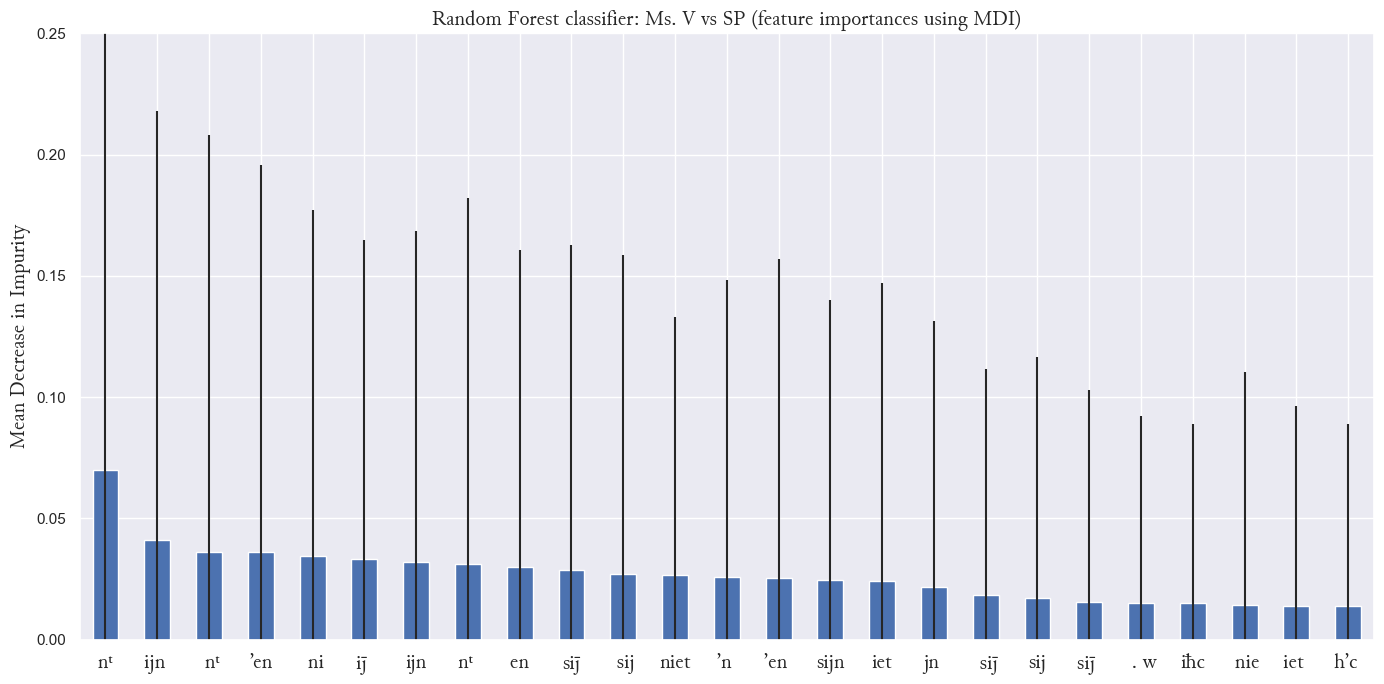

In [30]:
forest_importances = pd.Series(importances, index=names)
sns.set_theme()

# set junicode font for labels (able to render medieval glyphs)
font = {'family': 'Junicode',
        'size': 15,
        }

fig, ax = plt.subplots(figsize=(14, 7))
forest_importances.plot.bar(yerr=std, ax=ax, rot=0)
ax.set_title("Random Forest classifier: Ms. V vs SP (feature importances using MDI)", fontdict=font)
ax.set_ylabel("Mean Decrease in Impurity", fontdict=font)
ax.set_xticklabels(names, fontdict=font)
#ax.set_yticklabels(importances, fontdict=font)
ax.set_ylim((0, .25))
fig.tight_layout()
plt.savefig('graphics/V_SP_features_importance_mdi.svg', transparent=False, dpi=300)

In [31]:
forest_importances.index

Index([' nᵗ ', 'ijn ', ' nᵗ', 'ʼen', ' ni', 'i ', 'ijn', 'nᵗ ', ' en ', 'si',
       ' sij', 'niet', 'ʼn ', 'ʼen ', 'sijn', 'iet', 'jn ', ' si', 'sij',
       'si ', ' . w', 'iħc', ' nie', 'iet ', 'hʼc '],
      dtype='object')

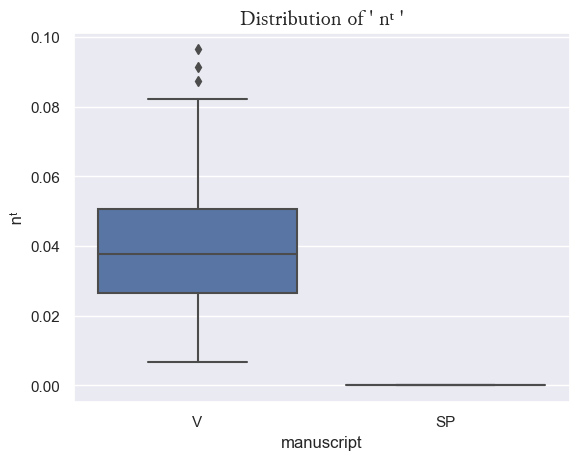

In [32]:
#Visualisation to see how the distinctive features are distributed in the manuscripts.
feature = ' nᵗ '  #replace the feature with the one you want to inspect. They can be copied from the output of the cell above.

font = {'family': 'Junicode',
        'size': 15,
        }

#Combine the bag-of-words models into one df (X and Y are the same as when the forest classifier was trained)
X = np.vstack((V1_, SP_))
y = ['V'] * num_slices + ['SP'] * num_slices 

df_distributionV_SP = pd.DataFrame(X, columns=vec1.get_feature_names_out()) #columns=vec1.get_feature_names_out()
df_distributionV_SP['manuscript'] = y #Column that specifies the manuscript for each row

sns.boxplot(x='manuscript', y=feature, data=df_distributionV_SP)
plt.title(f"Distribution of '{feature}'", fontdict=font)
plt.show()

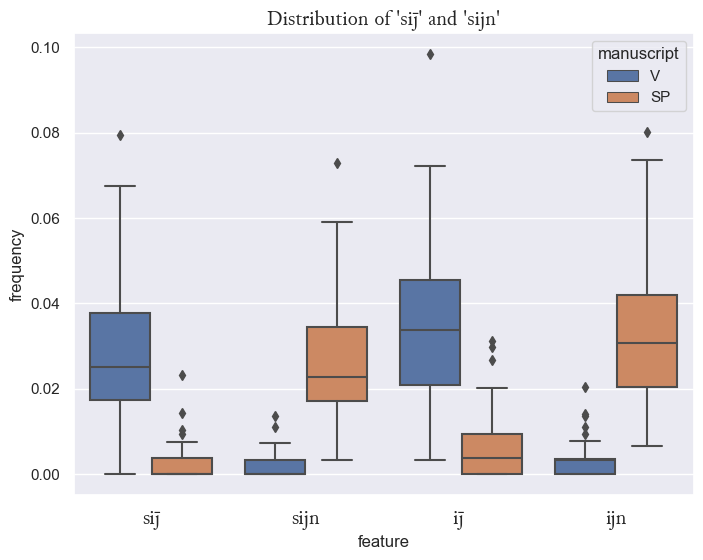

In [33]:
#Visualisation to see how the distinctive features are distributed in the manuscripts.
feature1 = 'si' #replace the features with the ones you want to inspect. They can be copied from the output of forest_importances.index.
feature2 = 'sijn'
feature3 = 'i '
feature4 = 'ijn'


font = {'family': 'Junicode',
        'size': 15,
        }

#Combine the bag-of-words models into one df (X and Y are the same as when the forest classifier was trained)
X = np.vstack((V1_, SP_))
y = ['V'] * num_slices + ['SP'] * num_slices 

df_distributionV_SP = pd.DataFrame(X, columns=vec1.get_feature_names_out()) #columns=vec1.get_feature_names_out()
df_distributionV_SP['manuscript'] = y #Column that specifies the manuscript for each row

#Melt the two features into a long DataFrame for seaborn
df_long = pd.melt(df_distributionV_SP, id_vars=['manuscript'], value_vars=[feature1, feature2, feature3, feature4],
                  var_name='feature', value_name='frequency') #
#print(df_long.head())
#print(df_long.tail())

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='feature', y='frequency', hue='manuscript', data=df_long)

#Change the font for the features on the x-axis so that they display correctly
for tick in ax.get_xticklabels():
    tick.set_fontfamily(font['family']) #Junicode
    tick.set_fontsize(font['size']) #15

plt.title(f"Distribution of '{feature1}' and '{feature2}'", fontdict=font)
plt.show()

Identifying distinctive features for the Viennese compared to the Brussels manuscript:

In [34]:
feature_names = vec2.get_feature_names_out()
forest = RandomForestClassifier(random_state=0)
forest.fit(np.vstack((V2_, B_)),  list('V' * num_slices + 'B' * num_slices))

RandomForestClassifier(random_state=0)

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [36]:
topn = 25 # default: 20
idxs = np.argsort(importances)[::-1][:topn]

In [37]:
importances = importances[idxs]
std = std[idxs]
names = np.array(vec2.get_feature_names_out())[idxs]
forest_importances = pd.Series(importances, index=names)

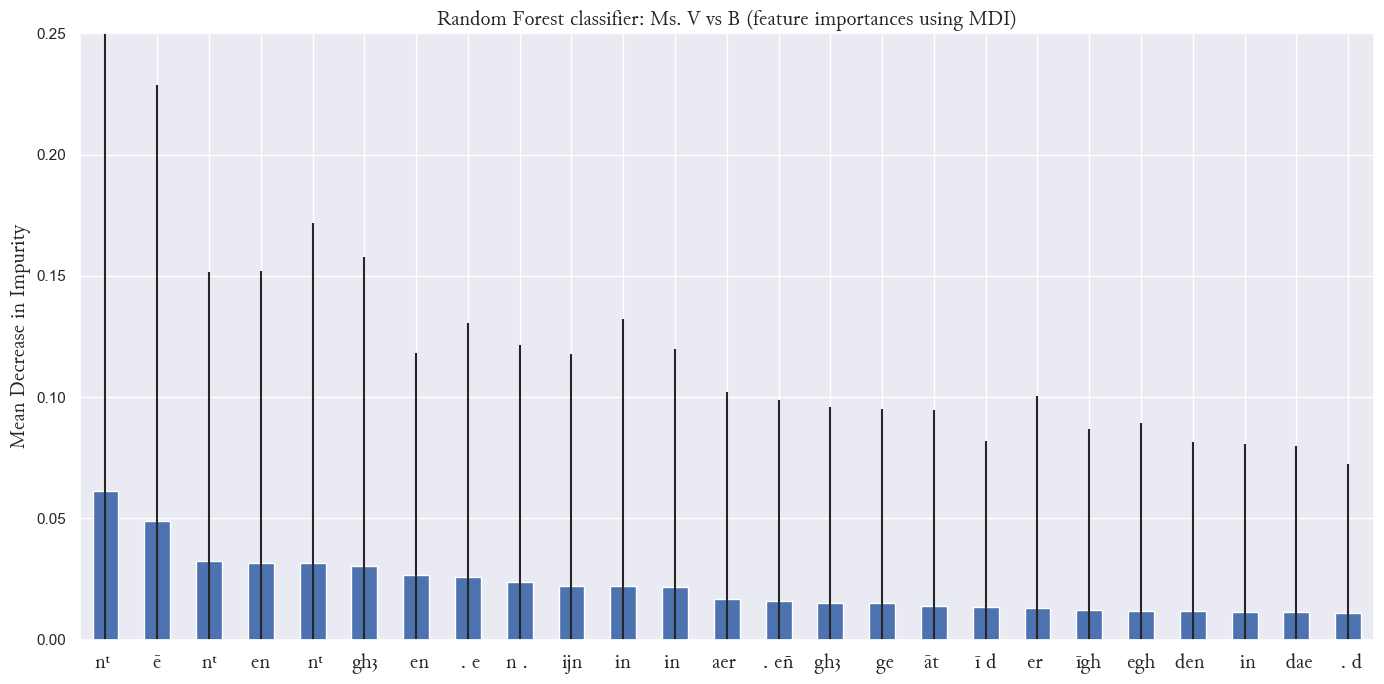

In [38]:
forest_importances = pd.Series(importances, index=names)
sns.set_theme()

# set junicode font for labels (able to render medieval glyphs)
font = {'family': 'Junicode',
        'size': 15,
        }

fig, ax = plt.subplots(figsize=(14, 7))
forest_importances.plot.bar(yerr=std, ax=ax, rot=0)
ax.set_title("Random Forest classifier: Ms. V vs B (feature importances using MDI)", fontdict=font)
ax.set_ylabel("Mean Decrease in Impurity", fontdict=font)
ax.set_xticklabels(names, fontdict=font)
#ax.set_yticklabels(importances, fontdict=font)
ax.set_ylim((0, .25))
fig.tight_layout()
plt.savefig('graphics/V_B_features_importance_mdi.svg', transparent=False, dpi=300)

In [39]:
forest_importances.index

Index(['nᵗ ', ' ē ', ' nᵗ ', ' en ', ' nᵗ', 'ghꝫ', ' en', ' . e', 'n . ',
       'ijn', ' in ', 'in ', 'aer ', '. e', 'ghꝫ ', ' ge', 'āt ', 'ī d',
       'er ', 'īgh', 'egh', 'den ', ' in', ' dae', ' . d'],
      dtype='object')

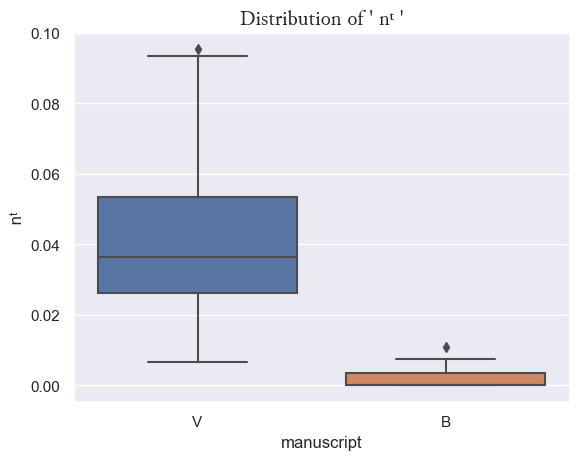

In [40]:
#Visualisation to see how the distinctive features are distributed in the manuscripts.
feature = ' nᵗ '  #replace the feature with the one you want to inspect. They can be copied from the output of the cell above.

font = {'family': 'Junicode',
        'size': 15,
        }

#Combine the bag-of-words models into one df (X and Y are the same as when the forest classifier was trained)
X = np.vstack((V2_, B_))
y = list('V' * num_slices + 'B' * num_slices) 

df_distributionV_B = pd.DataFrame(X, columns=vec2.get_feature_names_out()) #columns=vec2.get_feature_names_out()
df_distributionV_B['manuscript'] = y #Column that specifies the manuscript for each row

sns.boxplot(x='manuscript', y=feature, data=df_distributionV_B)
plt.title(f"Distribution of '{feature}'", fontdict=font)
plt.show()

### 7. Bootstrap on slices <a name='bootstrap'/>

For introductions and intution behind bootstrapping, see: 

- https://www.ebsco.com/research-starters/science/bootstrapping-statistics
- https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/#:~:text=The%20bootstrap%20method%20is%20a,the%20mean%20or%20standard%20deviation
- https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/
- https://www.mastersindatascience.org/learning/introduction-to-machine-learning-algorithms/bootstrapping/
- https://towardsdatascience.com/what-is-bootstrap-sampling-in-machine-learning-and-why-is-it-important-a5bb90cbd89a

Bootstrapping on slices for the Viennese and the Saint Petersburg manuscript:

In [41]:
num_boot_features = int(.5 * num_features) # analysis run on half of the number of features (0.5*1000)
num_bootstraps = 500

In [42]:
distances = []

for idx in tqdm(range(len(V1_))):
    d = []
    for _ in range(num_bootstraps):
        rnd_idxs = np.random.choice(range(num_features), size=num_boot_features, replace=False)
        d.append(distance.cosine(V1_[idx, rnd_idxs], SP_[idx, rnd_idxs]))
    distances.append((idx + 1,
                      np.quantile(d, 0.05),
                      np.quantile(d, 0.50),
                      np.quantile(d, 0.95)
                     ))

100%|██████████| 85/85 [00:10<00:00,  8.27it/s]


In [43]:
df = pd.DataFrame(distances, columns=('position', 'q05', 'q50', 'q95'))
df

position       q05       q50       q95
0          1  0.110535  0.147261  0.185277
1          2  0.049997  0.066963  0.090940
2          3  0.063471  0.084399  0.107958
3          4  0.034436  0.044634  0.055711
4          5  0.044364  0.055235  0.071743
..       ...       ...       ...       ...
80        81  0.050186  0.074187  0.099592
81        82  0.040471  0.055295  0.072129
82        83  0.034794  0.050826  0.070863
83        84  0.036877  0.047330  0.062223
84        85  0.043986  0.057700  0.075599

[85 rows x 4 columns]

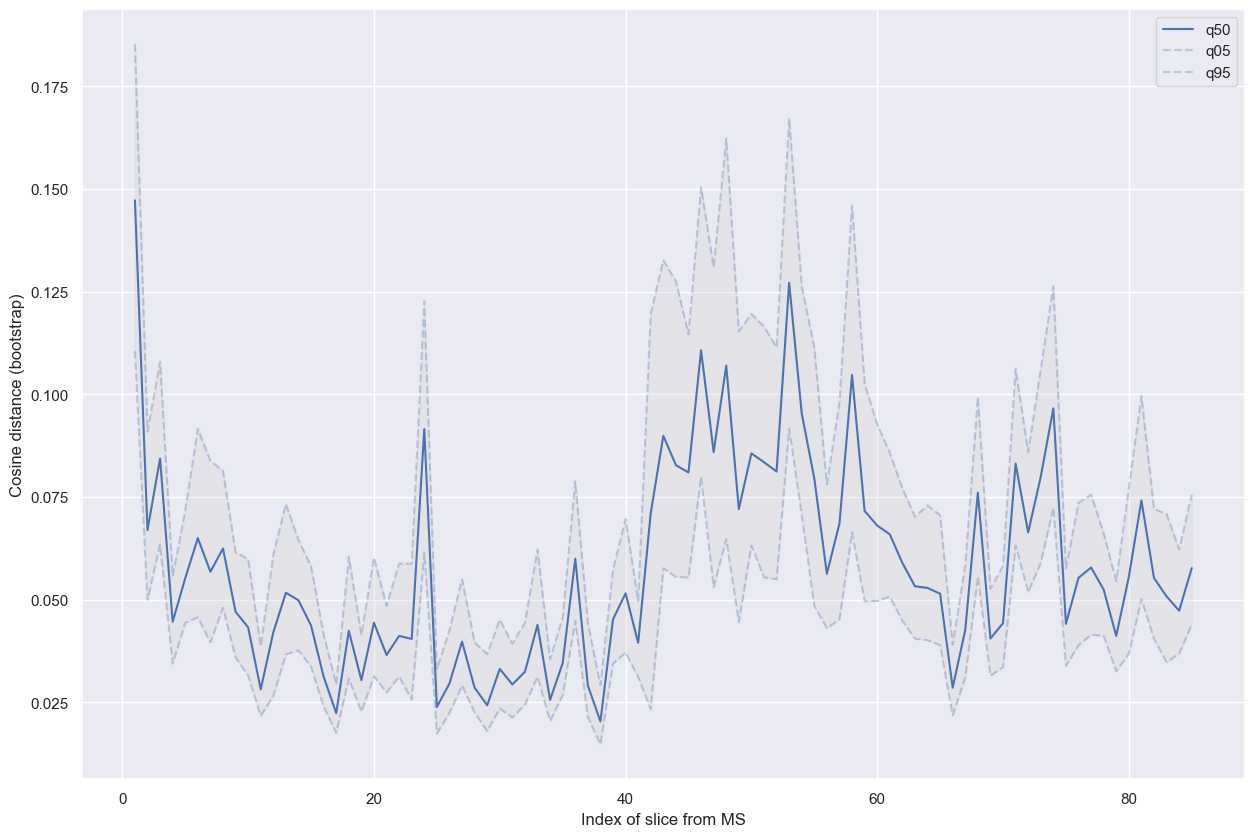

In [44]:
ax = df.plot(x='position', y='q50', figsize=(15,10), color='C0')
df.plot(x='position', y='q05', ax=ax, color='C0', ls='--', alpha=0.3)
df.plot(x='position', y='q95', ax=ax, color='C0', ls='--', alpha=0.3)
ax.fill_between(df['position'], df['q05'], df['q95'], color='lightgrey', alpha=0.3);
ax.set_ylabel('Cosine distance (bootstrap)');
ax.set_xlabel('Index of slice from MS');
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend();

plt.savefig('graphics/distance_SP_V_noisy.pdf', transparent=False)

In [45]:
d = np.polyfit(df['position'], df['q50'], 1)
f = np.poly1d(d)
df['pred'] = f(df['position'])

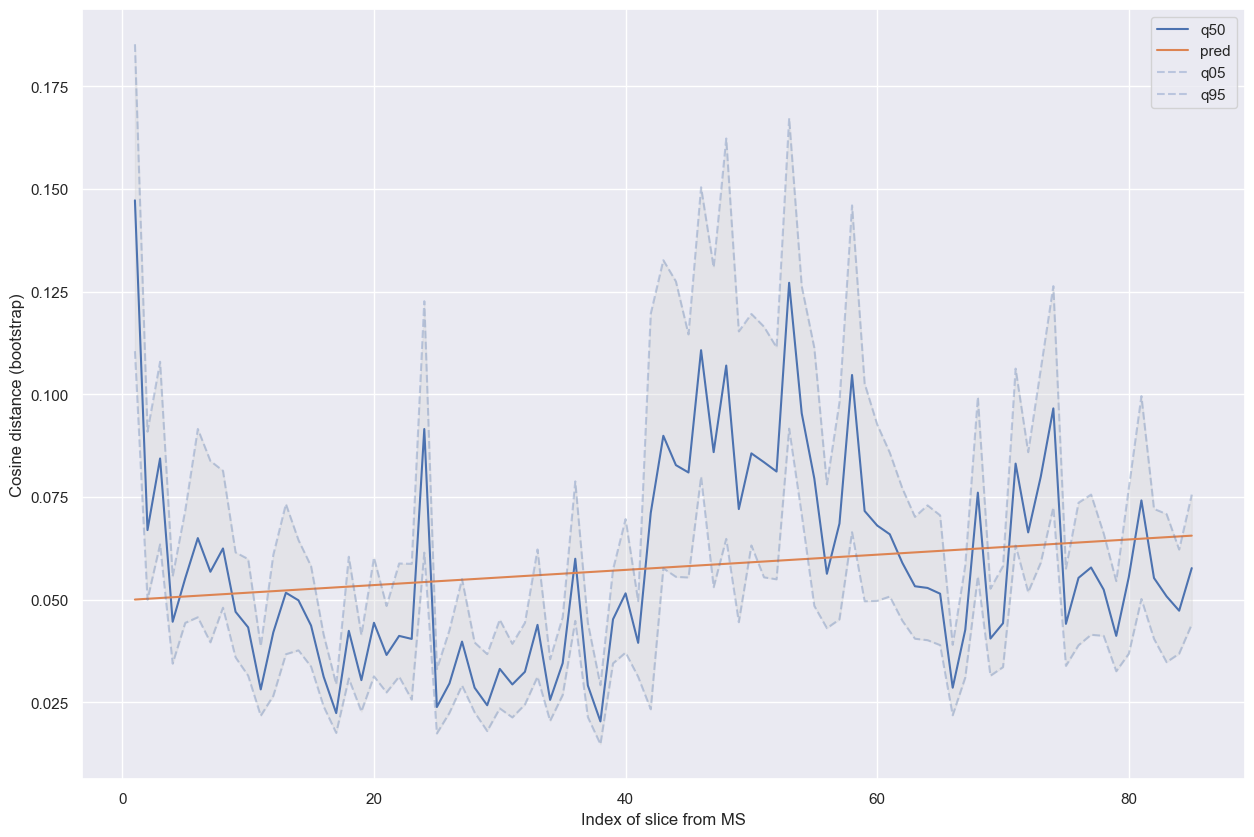

In [46]:
ax = df.plot(x='position', y='q50', figsize=(15,10), color='C0')
df.plot(x='position', y='pred', ax=ax, figsize=(15,10), color='C1')
df.plot(x='position', y='q05', ax=ax, color='C0', ls='--', alpha=0.3)
df.plot(x='position', y='q95', ax=ax, color='C0', ls='--', alpha=0.3)
ax.fill_between(df['position'], df['q05'], df['q95'], color='lightgrey', alpha=0.3);
ax.set_ylabel('Cosine distance (bootstrap)');
ax.set_xlabel('Index of slice from MS');
plt.legend();
plt.savefig('graphics/V_SP_distance_regression.pdf', transparent=False)
plt.savefig('graphics/V_SP_distance_regression.png', transparent=False, dpi=300)

In [47]:
for idx, v in enumerate(V1):
    if '''Hier beghent sente matheꝰ''' in v: # start of gospel of Matthew
        start_matthew = idx
    if '''E hier vol ghet Sēte marcus ewangelie''' in v: # start of gospel of Mark    
        start_mark = idx
    if '''Ende hier volghet Sēte lucas ewangelie''' in v: # start of gospel of Luke
        start_luke = idx
    if '''E hier volghet se te jans ewangelie''' in v: # start of gospel of John
        start_john = idx

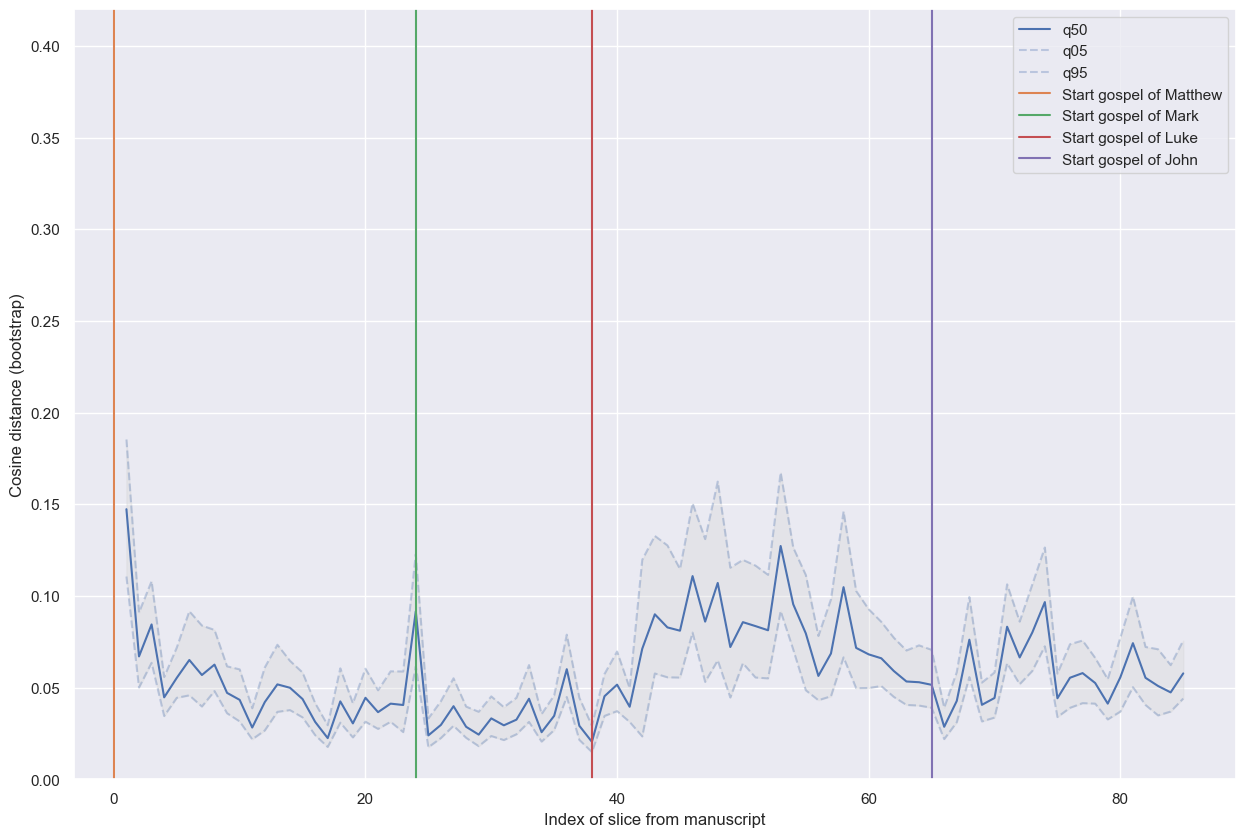

In [48]:
ax = df.plot(x='position', y='q50', figsize=(15,10), color='C0')
df.plot(x='position', y='q05', ax=ax, color='C0', ls='--', alpha=0.3)
df.plot(x='position', y='q95', ax=ax, color='C0', ls='--', alpha=0.3)
ax.set_ylim(0, 0.42) #manually assign the y-axis limit so that this plot and the next one will be on the same scale
ax.fill_between(df['position'], df['q05'], df['q95'], color='lightgrey', alpha=0.3);
ax.set_ylabel('Cosine distance (bootstrap)');
ax.set_xlabel('Index of slice from manuscript');
plt.axvline(start_matthew, color='C1', label='Start gospel of Matthew')
plt.axvline(start_mark, color='C2', label='Start gospel of Mark')
plt.axvline(start_luke, color='C3', label='Start gospel of Luke')
plt.axvline(start_john, color='C4', label='Start gospel of John')

# specify legend order manually
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4,5,6]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('graphics/V_SP_distance_bars.pdf', transparent=False)
plt.savefig('graphics/V_SP_distance_bars.png', transparent=False, dpi=300)
plt.savefig('graphics/V_SP_distance_bars.png', transparent=False, dpi=300)

In [49]:
print(len(V1[50]))
print(len(SP[50]))

4207
4286


Bootstrapping on slices for the Viennese and the Brussels manuscript:

In [50]:
num_boot_features = int(.5 * num_features) # analysis run on half of the number of features
num_bootstraps = 500

In [51]:
distances = []

for idx in tqdm(range(len(V2_))):
    d = []
    for _ in range(num_bootstraps):
        rnd_idxs = np.random.choice(range(num_features), size=num_boot_features, replace=False)
        d.append(distance.cosine(V2_[idx, rnd_idxs], B_[idx, rnd_idxs]))
    distances.append((idx + 1,
                      np.quantile(d, 0.05),
                      np.quantile(d, 0.50),
                      np.quantile(d, 0.95)
                     ))

100%|██████████| 85/85 [00:10<00:00,  7.91it/s]


In [52]:
df2 = pd.DataFrame(distances, columns=('position', 'q05', 'q50', 'q95'))
df2

position       q05       q50       q95
0          1  0.120775  0.156011  0.197335
1          2  0.025114  0.035436  0.049689
2          3  0.031023  0.039900  0.049150
3          4  0.035371  0.042434  0.051890
4          5  0.032732  0.042528  0.056474
..       ...       ...       ...       ...
80        81  0.156659  0.199236  0.242964
81        82  0.097538  0.119893  0.150708
82        83  0.130518  0.170306  0.222344
83        84  0.150568  0.188431  0.235240
84        85  0.103961  0.138969  0.181488

[85 rows x 4 columns]

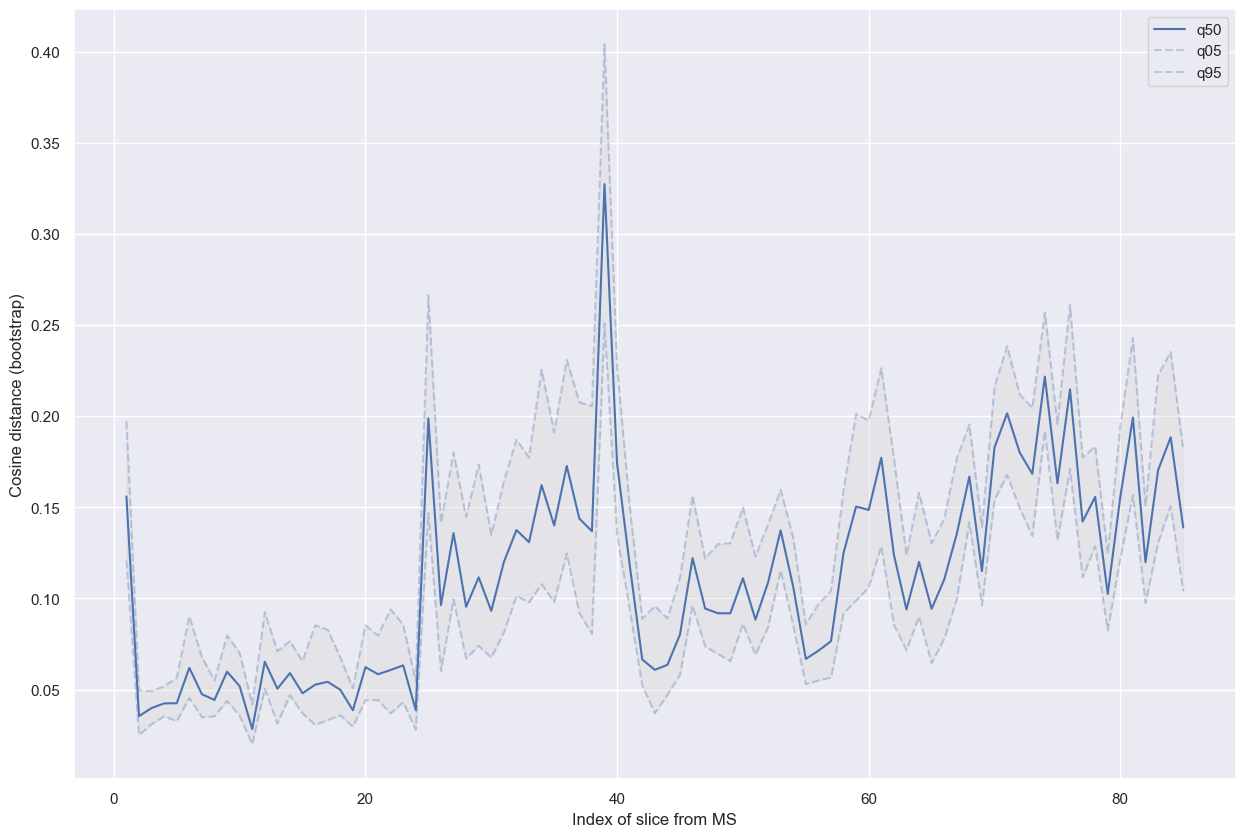

In [53]:
ax = df2.plot(x='position', y='q50', figsize=(15,10), color='C0')
df2.plot(x='position', y='q05', ax=ax, color='C0', ls='--', alpha=0.3)
df2.plot(x='position', y='q95', ax=ax, color='C0', ls='--', alpha=0.3)
ax.fill_between(df['position'], df2['q05'], df2['q95'], color='lightgrey', alpha=0.3);
ax.set_ylabel('Cosine distance (bootstrap)');
ax.set_xlabel('Index of slice from MS');
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend();

plt.savefig('graphics/distance_B_V_noisy.pdf', transparent=False)

In [54]:
d = np.polyfit(df2['position'], df2['q50'], 1)
f = np.poly1d(d)
df2['pred'] = f(df2['position'])

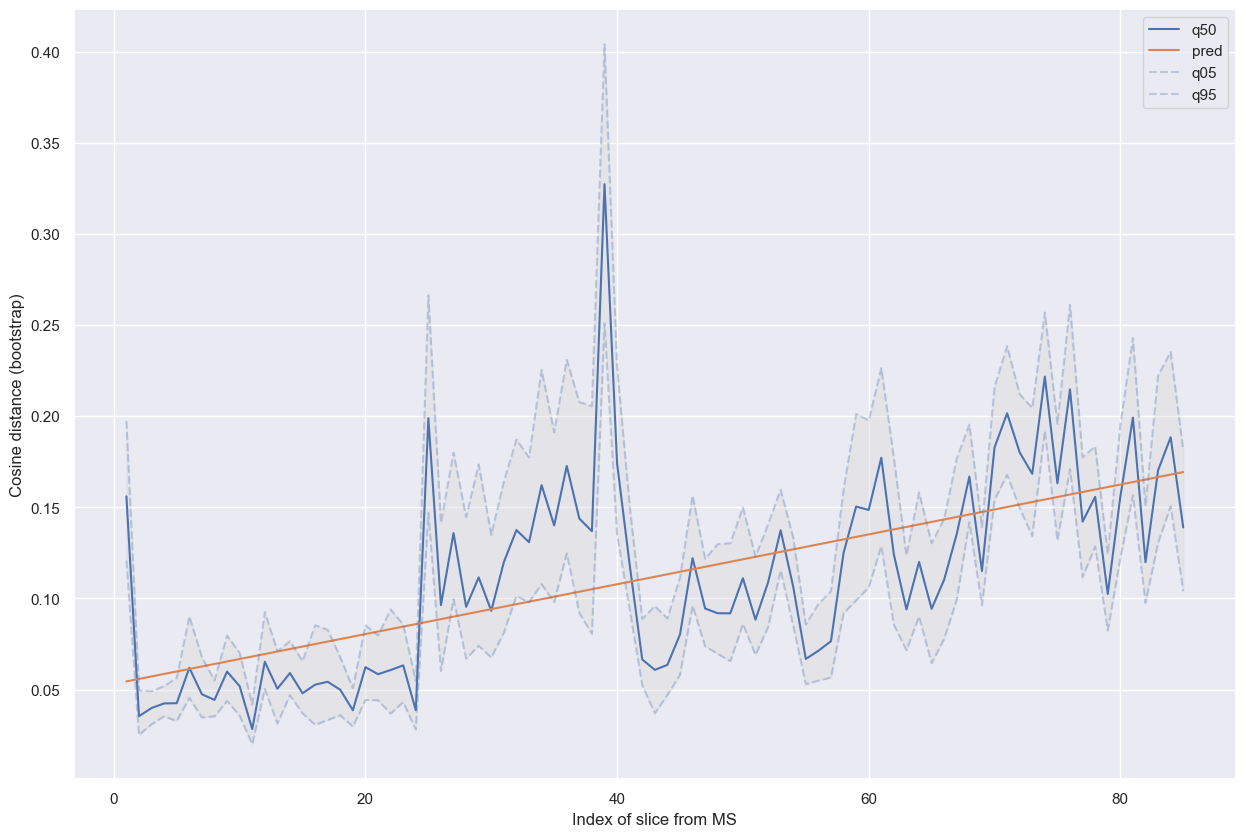

In [55]:
ax = df2.plot(x='position', y='q50', figsize=(15,10), color='C0')
df2.plot(x='position', y='pred', ax=ax, figsize=(15,10), color='C1')
df2.plot(x='position', y='q05', ax=ax, color='C0', ls='--', alpha=0.3)
df2.plot(x='position', y='q95', ax=ax, color='C0', ls='--', alpha=0.3)
ax.fill_between(df2['position'], df2['q05'], df2['q95'], color='lightgrey', alpha=0.3);
ax.set_ylabel('Cosine distance (bootstrap)');
ax.set_xlabel('Index of slice from MS');
plt.legend();
plt.savefig('graphics/V_B_distance_regression.pdf', transparent=False)
plt.savefig('graphics/V_B_distance_regression.png', transparent=False, dpi=300)

In [56]:
for idx, v in enumerate(V2):
    if '''Hier beghent sente matheꝰ''' in v: # start of gospel of Matthew
        start_matthew = idx
    if '''E hier vol ghet Sēte marcus ewangelie''' in v: # start of gospel of Mark    
        start_mark = idx
    if '''Ende hier volghet Sēte lucas ewangelie''' in v: # start of gospel of Luke
        start_luke = idx
    if '''E hier volghet se te jans ewangelie''' in v: # start of gospel of John
        start_john = idx

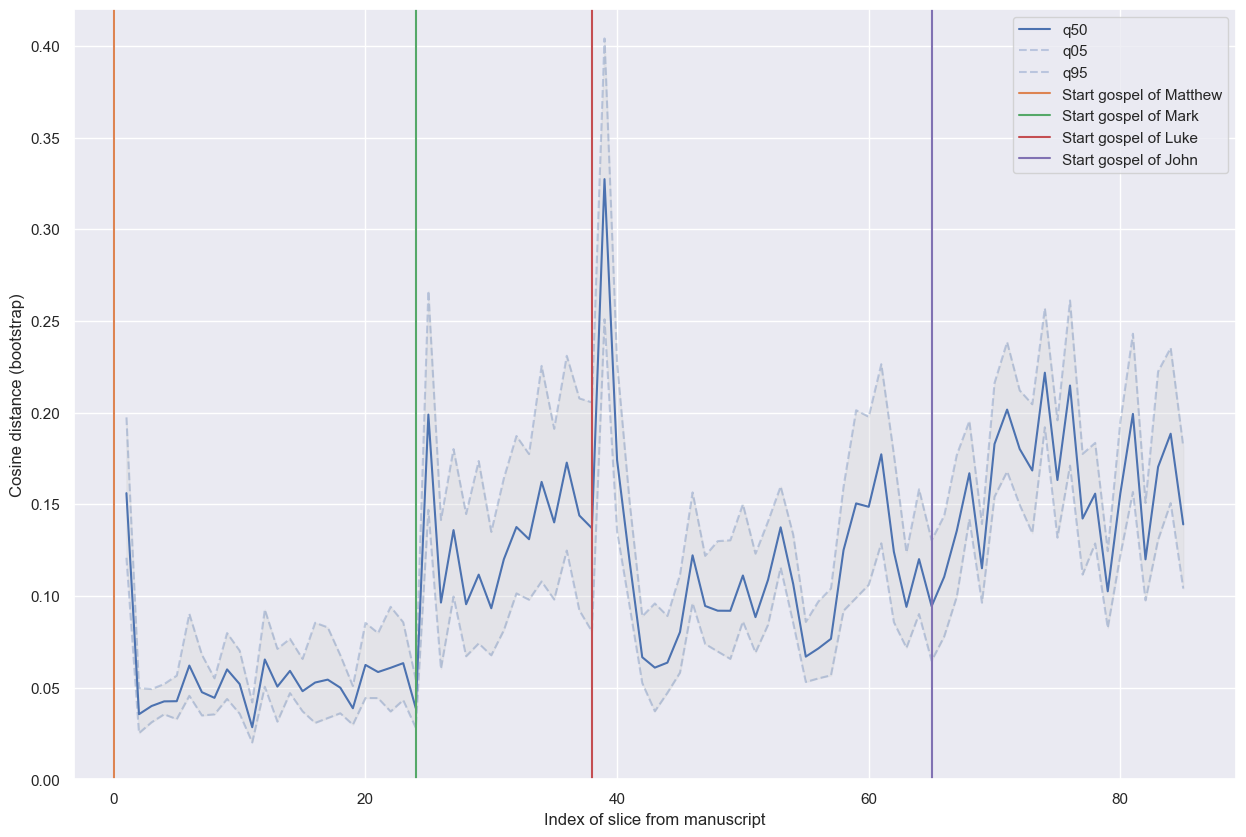

In [57]:
ax = df2.plot(x='position', y='q50', figsize=(15,10), color='C0')
df2.plot(x='position', y='q05', ax=ax, color='C0', ls='--', alpha=0.3)
df2.plot(x='position', y='q95', ax=ax, color='C0', ls='--', alpha=0.3)
ax.set_ylim(0, 0.42)
ax.fill_between(df2['position'], df2['q05'], df2['q95'], color='lightgrey', alpha=0.3);
ax.set_ylabel('Cosine distance (bootstrap)');
ax.set_xlabel('Index of slice from manuscript');
plt.axvline(start_matthew, color='C1', label='Start gospel of Matthew')
plt.axvline(start_mark, color='C2', label='Start gospel of Mark')
plt.axvline(start_luke, color='C3', label='Start gospel of Luke')
plt.axvline(start_john, color='C4', label='Start gospel of John')

# specify legend order manually
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4,5,6]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('graphics/V_B_distance_bars.pdf', transparent=False)
plt.savefig('graphics/V_B_distance_bars.png', transparent=False, dpi=300)
plt.savefig('graphics/V_B_distance_bars.png', transparent=False, dpi=300)

In [58]:
print(len(V2[50]))
print(len(B[50]))

4399
4424


In [59]:
#this code is to compare the y-values of both graphs for specific segments 
df[65:]

position       q05       q50       q95      pred
65        66  0.021862  0.028575  0.039028  0.062088
66        67  0.031071  0.042687  0.058386  0.062273
67        68  0.055682  0.076083  0.099368  0.062458
68        69  0.031492  0.040555  0.052696  0.062643
69        70  0.033591  0.044278  0.058208  0.062829
70        71  0.063207  0.083150  0.106287  0.063014
71        72  0.051825  0.066396  0.085938  0.063199
72        73  0.059004  0.079968  0.106133  0.063384
73        74  0.072472  0.096597  0.126374  0.063569
74        75  0.033894  0.044133  0.057586  0.063754
75        76  0.038912  0.055326  0.073620  0.063940
76        77  0.041471  0.057854  0.075614  0.064125
77        78  0.041205  0.052464  0.066158  0.064310
78        79  0.032583  0.041202  0.054537  0.064495
79        80  0.036856  0.055559  0.077236  0.064680
80        81  0.050186  0.074187  0.099592  0.064866
81        82  0.040471  0.055295  0.072129  0.065051
82        83  0.034794  0.050826  0.070863  0.065236
83        84  0.036877  0.047330  0.062223  0.065421
84        85  0.043986  0.057700  0.075599  0.065606

In [60]:
#this code is to compare the y-values of both graphs for specific segments 
df2[65:] 

position       q05       q50       q95      pred
65        66  0.077820  0.110363  0.143708  0.143353
66        67  0.099506  0.135451  0.176850  0.144720
67        68  0.141845  0.166870  0.195382  0.146087
68        69  0.096275  0.115033  0.139179  0.147454
69        70  0.154073  0.182816  0.216129  0.148821
70        71  0.167779  0.201590  0.238419  0.150188
71        72  0.149657  0.180123  0.212063  0.151555
72        73  0.134194  0.168374  0.204491  0.152922
73        74  0.191951  0.221706  0.256905  0.154289
74        75  0.131752  0.163178  0.195772  0.155656
75        76  0.171001  0.214707  0.261126  0.157024
76        77  0.111596  0.142168  0.177420  0.158391
77        78  0.128574  0.155736  0.183426  0.159758
78        79  0.082468  0.102474  0.124378  0.161125
79        80  0.122075  0.155839  0.194990  0.162492
80        81  0.156659  0.199236  0.242964  0.163859
81        82  0.097538  0.119893  0.150708  0.165226
82        83  0.130518  0.170306  0.222344  0.166593
83        84  0.150568  0.188431  0.235240  0.167960
84        85  0.103961  0.138969  0.181488  0.169327

### 7. Calculating Zeta for contrastive analysis <a name='zeta'/>

**References**: 

Burrows, John. 2006. All the way through: Testing for authorship in different frequency strata. *Literary and Linguistic Computing*, 22(1):27–47.

Du, Keli, Julia Dudar, Cora Rok, and Christof Schöch. 2021. Zeta eta: An exploration and evaluation of two dispersion-based measures of distinctiveness. *Proceedings of the Computational Humanities Research Conference 2021*, 2989:181–194.

#### 8.1. Zeta for full manuscripts <a name='zetafull'/>

Viennese and Saint Petersburg manuscript:

In [61]:
from nltk import word_tokenize
import re

def segment(text):
    token_pattern = re.compile(r"(?u)\b\w+\b")
    tokens = [w.lower() for w in token_pattern.findall(text)]
    tokens_clean = [item for i,item in enumerate(tokens)]
    return tokens_clean


v1_docs = []
for idx, v1 in enumerate(V1):
    v1_doc = segment(v1)
    v1_docs.append(v1_doc)
    
sp_docs = []
for idx, sp in enumerate(SP):
    sp_doc = segment(sp)
    sp_docs.append(sp_doc)
    
from sklearn.feature_extraction.text import CountVectorizer

zeta_vectorizer = CountVectorizer(max_features=150, # original: CountVectorizer
                                  analyzer=lambda x: x,
                                  binary=True)

zeta_vectorizer.fit(v1_docs + sp_docs)
zeta_vocab = zeta_vectorizer.get_feature_names_out()  #original code was get_feature_names, which was not working.

_v1 = zeta_vectorizer.transform(v1_docs).toarray()
_sp = zeta_vectorizer.transform(sp_docs).toarray()

n_v1 = _v1.shape[0]
n_sp = _sp.shape[0]
print(f'Number of V-segments: {n_v1}')
print(f'Number of SP-segments: {n_sp}')

Number of V-segments: 85
Number of SP-segments: 85


In [62]:
# get df's for features per sample
df_v1_ = pd.DataFrame(_v1, columns = zeta_vectorizer.get_feature_names_out())
df_sp_ = pd.DataFrame(_sp, columns = zeta_vectorizer.get_feature_names_out())
#df_v1_#.T.loc['sijn']
df_v1_

a  al  alle  alse  alsoe  andʼe  bi  comē  cōt  daer  ...  wie  wilt  wāt  \
0   0   1     1     1      1      0   0     1    0     1  ...    0     1    1   
1   1   1     1     1      0      0   1     1    1     1  ...    1     1    1   
2   0   1     1     1      1      0   1     0    0     1  ...    1     1    1   
3   1   1     0     1      1      1   1     0    0     1  ...    1     1    1   
4   1   1     1     1      1      0   1     1    0     0  ...    1     1    1   
.. ..  ..   ...   ...    ...    ...  ..   ...  ...   ...  ...  ...   ...  ...   
80  1   1     1     1      0      0   0     1    1     0  ...    0     0    1   
81  0   1     1     1      1      0   1     0    1     1  ...    0     0    1   
82  0   0     1     1      1      1   0     0    0     1  ...    0     0    1   
83  0   1     1     1      1      0   1     1    0     1  ...    0     1    1   
84  1   0     1     1      1      1   0     1    0     1  ...    1     0    1   

    wʼdē  wʼt  x  ē  ī  ōme  ōs  
0      1    0  1  1  1    0   1  
1      1    0  0  1  1    0   1  
2      1    0  1  1  1    1   0  
3      1    1  0  1  1    0   1  
4      1    1  0  1  1    1   0  
..   ...  ... .. .. ..  ...  ..  
80     1    0  0  1  1    1   0  
81     0    0  1  1  1    1   0  
82     0    1  0  1  1    1   0  
83     1    0  1  1  1    1   0  
84     1    0  1  1  1    1   0  

[85 rows x 150 columns]

In [63]:
dp_v1 = _v1.sum(axis=0) / n_v1
dp_sp = _sp.sum(axis=0) / n_sp

Z = dp_v1 - dp_sp

In [64]:
import numpy as np
ranked = [(zeta_vocab[idx], Z[idx]) for idx in np.argsort(Z)]

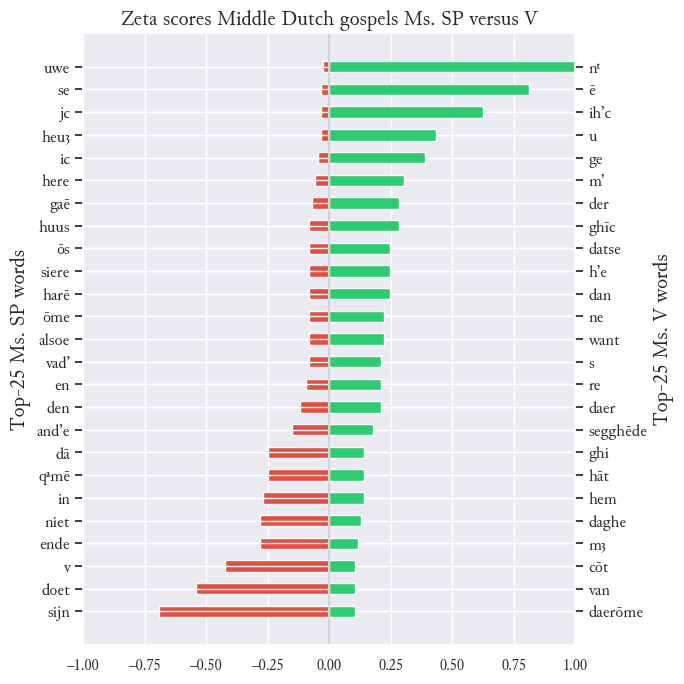

In [65]:
sns.set(font="Junicode")

width = .50
m = 25

fig = plt.figure(figsize=(7, 7))

sp_labels, sp_scores = zip(*ranked[:m])
v1_labels, v1_scores = zip(*ranked[-m:])

pos = np.arange(m) - (width / 2)

ax1 = fig.add_subplot(111)
plt.barh(pos, sp_scores, width, color="#e74c3c")
plt.yticks(pos, sp_labels, fontsize = 12)
ax1.set_ylabel(f'Top-{m} Ms. SP words', fontsize = 15)

ax2 = ax1.twinx()
ax2.barh(pos, v1_scores, width, color='#2ecc71')
ax2.set_yticks(pos)
ax2.set_yticklabels(v1_labels, fontsize = 12)

plt.xlim((-1, + 1))
plt.axvline(0, color='lightgrey')
ax2.set_ylabel(f'Top-{m} Ms. V words', fontsize = 15)
plt.xlabel('Zeta scores', fontdict=font)
plt.title(f'Zeta scores Middle Dutch gospels Ms. SP versus V', fontdict=font)
plt.tight_layout()
plt.savefig(f'graphics/zeta_V_SP.png', dpi=300)

In [66]:
print(sp_labels)
print(v1_labels)

('sijn', 'doet', 'v', 'ende', 'niet', 'in', 'qᵃmē', 'dā', 'andʼe', 'den', 'en', 'vadʼ', 'alsoe', 'ōme', 'harē', 'siere', 'ōs', 'huus', 'gaē', 'here', 'ic', 'heuꝫ', 'jc', 'se', 'uwe')
('daerōme', 'van', 'cōt', 'mꝫ', 'daghe', 'hem', 'hāt', 'ghi', 'segghēde', 'daer', 're', 's', 'want', 'ne', 'dan', 'hʼe', 'datse', 'ghīc', 'der', 'mʼ', 'ge', 'u', 'ihʼc', 'ē', 'nᵗ')


Viennese and Brussels manuscript:

In [67]:
from nltk import word_tokenize
import re

def segment(text):
    token_pattern = re.compile(r"(?u)\b\w+\b")
    tokens = [w.lower() for w in token_pattern.findall(text)]
    tokens_clean = [item for i,item in enumerate(tokens)]
    return tokens_clean


v2_docs = []
for idx, v2 in enumerate(V2):
    v2_doc = segment(v2)
    v2_docs.append(v2_doc)
    
b_docs = []
for idx, b in enumerate(B):
    b_doc = segment(b)
    b_docs.append(b_doc)
    
from sklearn.feature_extraction.text import CountVectorizer

zeta_vectorizer = CountVectorizer(max_features=150, # original: CountVectorizer
                                  analyzer=lambda x: x,
                                  binary=True)

zeta_vectorizer.fit(v2_docs + b_docs)
zeta_vocab = zeta_vectorizer.get_feature_names_out()  #original code was get_feature_names, which was not working.

_v2 = zeta_vectorizer.transform(v2_docs).toarray()
_b = zeta_vectorizer.transform(b_docs).toarray()

n_v2 = _v2.shape[0]
n_b = _b.shape[0]
print(f'Number of V-segments: {n_v2}')
print(f'Number of B-segments: {n_b}')

Number of V-segments: 85
Number of B-segments: 85


In [68]:
# get df's for features per sample
df_v2_ = pd.DataFrame(_v2, columns = zeta_vectorizer.get_feature_names_out())
df_b_ = pd.DataFrame(_b, columns = zeta_vectorizer.get_feature_names_out())
#df_v2_#.T.loc['sijn']
df_v2_

a  al  alle  alse  alsoe  best  bi  comē  d  daer  ...  wijf  wilt  wāt  \
0   0   1     1     1      1     1   0     1  0     1  ...     1     1    1   
1   1   1     1     1      0     1   1     1  1     1  ...     0     1    1   
2   0   1     1     1      1     1   1     0  1     1  ...     1     1    1   
3   1   1     0     1      1     1   1     0  1     1  ...     0     1    1   
4   1   0     1     1      1     0   1     1  0     0  ...     0     1    1   
.. ..  ..   ...   ...    ...   ...  ..   ... ..   ...  ...   ...   ...  ...   
80  1   1     1     1      0     0   0     1  1     0  ...     0     0    1   
81  0   1     1     1      1     0   1     0  0     1  ...     0     0    1   
82  0   0     1     1      1     1   0     0  0     1  ...     0     0    1   
83  0   1     1     1      1     0   1     1  0     1  ...     1     1    1   
84  1   0     1     1      1     0   0     1  1     1  ...     0     0    1   

    wʼdē  wʼelt  wʼt  x  ē  ī  ōme  
0      1      0    0  1  1  1    0  
1      1      1    0  1  1  1    0  
2      1      1    0  0  1  1    1  
3      1      0    1  0  1  1    0  
4      1      0    1  0  1  1    1  
..   ...    ...  ... .. .. ..  ...  
80     1      1    0  0  1  1    1  
81     0      1    0  1  1  1    1  
82     0      1    1  0  1  1    1  
83     1      0    0  1  1  1    1  
84     1      0    0  1  1  1    1  

[85 rows x 150 columns]

In [69]:
dp_v2 = _v2.sum(axis=0) / n_v2
dp_b = _b.sum(axis=0) / n_b

Z = dp_v2 - dp_b

In [70]:
import numpy as np
ranked = [(zeta_vocab[idx], Z[idx]) for idx in np.argsort(Z)]

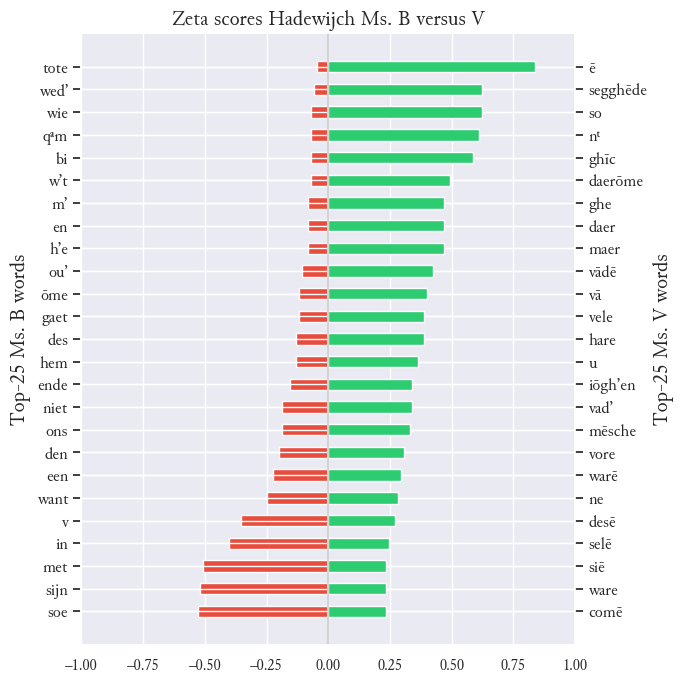

In [71]:
sns.set(font="Junicode")

width = .50
m = 25

fig = plt.figure(figsize=(7, 7))

b_labels, b_scores = zip(*ranked[:m])
v2_labels, v2_scores = zip(*ranked[-m:])

pos = np.arange(m) - (width / 2)

ax1 = fig.add_subplot(111)
plt.barh(pos, b_scores, width, color="#e74c3c")
plt.yticks(pos, b_labels, fontsize = 12)
ax1.set_ylabel(f'Top-{m} Ms. B words', fontsize = 15)

ax2 = ax1.twinx()
ax2.barh(pos, v2_scores, width, color='#2ecc71')
ax2.set_yticks(pos)
ax2.set_yticklabels(v2_labels, fontsize = 12)

plt.xlim((-1, + 1))
plt.axvline(0, color='lightgrey')
ax2.set_ylabel(f'Top-{m} Ms. V words', fontsize = 15)
plt.xlabel('Zeta scores', fontdict=font)
plt.title(f'Zeta scores Hadewijch Ms. B versus V', fontdict=font)
plt.tight_layout()
plt.savefig(f'graphics/zeta_V_B.png', dpi=300)

In [72]:
print(b_labels)
print(v2_labels)

('soe', 'sijn', 'met', 'in', 'v', 'want', 'een', 'den', 'ons', 'niet', 'ende', 'hem', 'des', 'gaet', 'ōme', 'ouʼ', 'hʼe', 'en', 'mʼ', 'wʼt', 'bi', 'qᵃm', 'wie', 'wedʼ', 'tote')
('comē', 'ware', 'siē', 'selē', 'desē', 'ne', 'warē', 'vore', 'mēsche', 'vadʼ', 'iōghʼen', 'u', 'hare', 'vele', 'vā', 'vādē', 'maer', 'daer', 'ghe', 'daerōme', 'ghīc', 'nᵗ', 'so', 'segghēde', 'ē')


#### 8.2. Zeta for specific *_windows_* <a name='zetaspecific'/>

Viennese and Saint Petersburg manuscript:

In [155]:
for idx, v in enumerate(V1):
    if '''Hier beghent sente matheꝰ''' in v: # start of gospel of Matthew
        print('Mat',idx)
    if '''E hier vol ghet Sēte marcus ewangelie''' in v: # start of gospel of Mark    
        print('Mar',idx)
    if '''Ende hier volghet Sēte lucas ewangelie''' in v: # start of gospel of Luke
        print('L',idx)
    if '''E hier volghet se te jans ewangelie''' in v: # start of gospel of John
        print('J',idx)

Mat 0
Mar 24
L 38
J 65


In [194]:
# window to perform Zeta for
windows_of_interest = list(range(25,39))  #these are the slices for the gospel of Matthew

from nltk import word_tokenize
import re

def segment(text):
    token_pattern = re.compile(r"(?u)\b\w+\b")
    tokens = [w.lower() for w in token_pattern.findall(text)]
    tokens_clean = [item for i,item in enumerate(tokens)]
    return tokens_clean

v1_docs = []
for idx in windows_of_interest:
    v1_doc = segment(V1[idx])
    v1_docs.append(v1_doc)
    
sp_docs = []
for idx in windows_of_interest:
    sp_doc = segment(SP[idx])
    sp_docs.append(sp_doc)

from sklearn.feature_extraction.text import CountVectorizer

zeta_vectorizer = CountVectorizer(max_features=100,
                                  analyzer=lambda x: x,
                                  binary=True)

zeta_vectorizer.fit(v1_docs + sp_docs)
zeta_vocab = zeta_vectorizer.get_feature_names_out()

_v1 = zeta_vectorizer.transform(v1_docs).toarray()
_sp = zeta_vectorizer.transform(sp_docs).toarray()

n_v1 = _v1.shape[0]
n_sp = _sp.shape[0]
print(f'Number of V-segments: {n_v1}')
print(f'Number of SP-segments: {n_sp}')

Number of V-segments: 14
Number of SP-segments: 14


In [195]:
dp_v1 = _v1.sum(axis=0) / n_v1
dp_sp = _sp.sum(axis=0) / n_sp

Z = dp_v1 - dp_sp

import numpy as np
ranked = [(zeta_vocab[idx], Z[idx]) for idx in np.argsort(Z)]

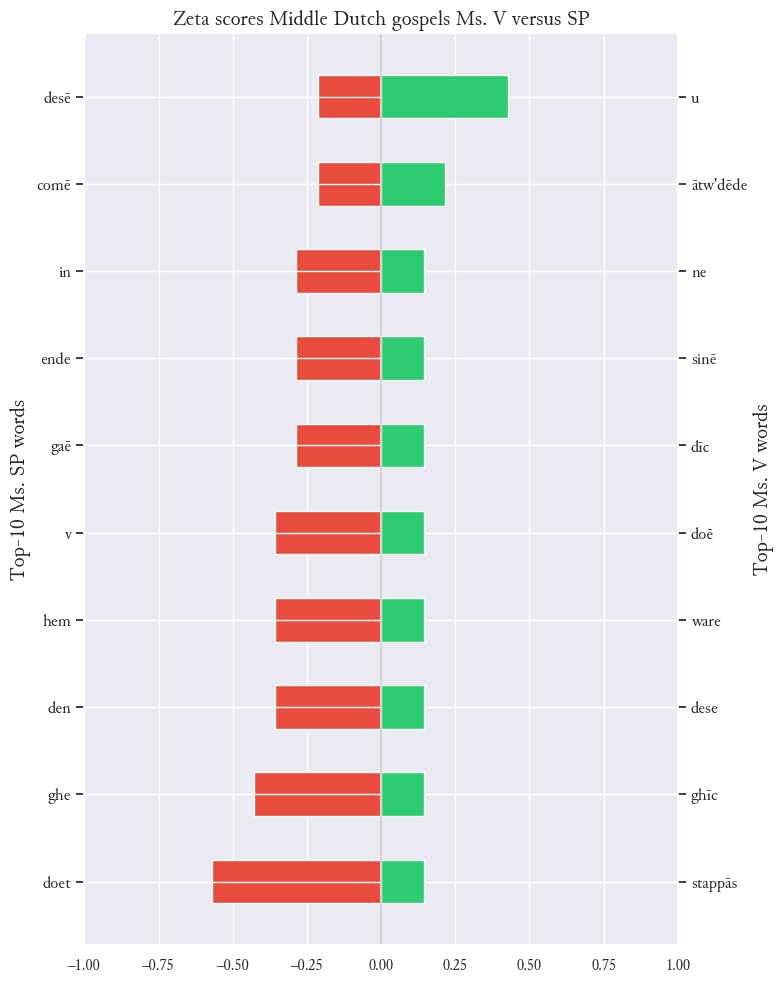

In [196]:
sns.set(font="Junicode")

width = .50
m = 10

fig = plt.figure(figsize=(8, 10))

sp_labels, sp_scores = zip(*ranked[:m])
v1_labels, v1_scores = zip(*ranked[-m:])

pos = np.arange(m) - (width / 2)

ax1 = fig.add_subplot(111)
plt.barh(pos, sp_scores, width, color="#e74c3c")
plt.yticks(pos, sp_labels, fontsize = 12)
ax1.set_ylabel(f'Top-{m} Ms. SP words', fontsize = 15)

ax2 = ax1.twinx()
ax2.barh(pos, v1_scores, width, color='#2ecc71')
ax2.set_yticks(pos)
ax2.set_yticklabels(v1_labels, fontsize = 12)

plt.xlim((-1, + 1))
plt.axvline(0, color='lightgrey')
ax2.set_ylabel(f'Top-{m} Ms. V words', fontsize = 15)
plt.xlabel('Zeta scores', fontdict=font)
plt.title(f'Zeta scores Middle Dutch gospels Ms. V versus SP', fontdict=font)
plt.tight_layout()
plt.savefig(f'graphics/zeta_specific_windows_V_SP.png', dpi=300)

Viennese and Brussels manuscript:

In [197]:
for idx, v in enumerate(V2):
    if '''Hier beghent sente matheꝰ''' in v: # start of gospel of Matthew
        print('Mat',idx)
    if '''E hier vol ghet Sēte marcus ewangelie''' in v: # start of gospel of Mark    
        print('Mar',idx)
    if '''Ende hier volghet Sēte lucas ewangelie''' in v: # start of gospel of Luke
        print('L',idx)
    if '''E hier volghet se te jans ewangelie''' in v: # start of gospel of John
        print('J',idx)

Mat 0
Mar 24
L 38
J 65


In [198]:
# window to perform Zeta for
windows_of_interest = list(range(25,39))  #these are the slices for the gospel of Matthew

from nltk import word_tokenize
import re

def segment(text):
    token_pattern = re.compile(r"(?u)\b\w+\b")
    tokens = [w.lower() for w in token_pattern.findall(text)]
    tokens_clean = [item for i,item in enumerate(tokens)]
    return tokens_clean

v2_docs = []
for idx in windows_of_interest:
    v2_doc = segment(V2[idx])
    v2_docs.append(v2_doc)
    
b_docs = []
for idx in windows_of_interest:
    b_doc = segment(B[idx])
    b_docs.append(b_doc)

from sklearn.feature_extraction.text import CountVectorizer

zeta_vectorizer = CountVectorizer(max_features=100,
                                  analyzer=lambda x: x,
                                  binary=True)

zeta_vectorizer.fit(v2_docs + sp_docs)
zeta_vocab = zeta_vectorizer.get_feature_names_out()

_v2 = zeta_vectorizer.transform(v2_docs).toarray()
_b = zeta_vectorizer.transform(b_docs).toarray()

n_v2 = _v2.shape[0]
n_b = _b.shape[0]
print(f'Number of V-segments: {n_v2}')
print(f'Number of B-segments: {n_b}')

Number of V-segments: 14
Number of B-segments: 14


In [199]:
dp_v2 = _v2.sum(axis=0) / n_v2
dp_b = _b.sum(axis=0) / n_b

Z = dp_v2 - dp_b

import numpy as np
ranked = [(zeta_vocab[idx], Z[idx]) for idx in np.argsort(Z)]

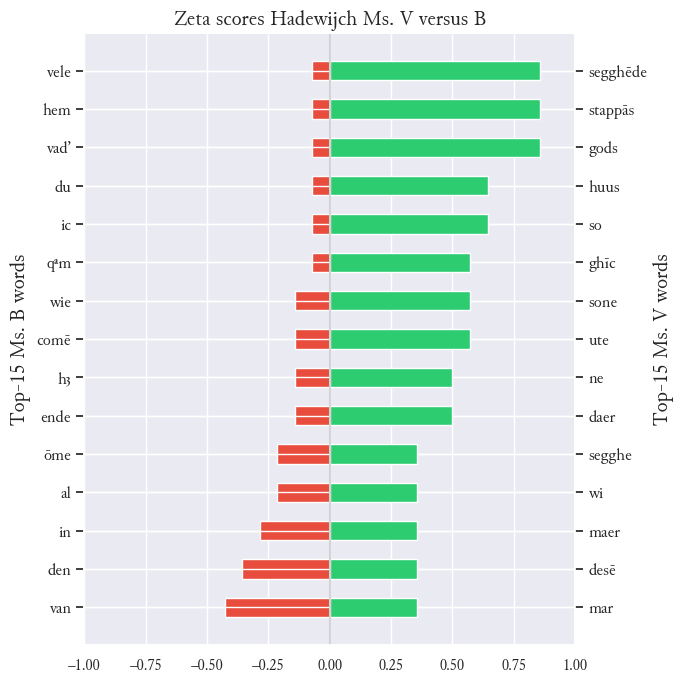

In [201]:
sns.set(font="Junicode")

width = .50
m = 15

fig = plt.figure(figsize=(7, 7))

b_labels, b_scores = zip(*ranked[:m])
v2_labels, v2_scores = zip(*ranked[-m:])

pos = np.arange(m) - (width / 2)

ax1 = fig.add_subplot(111)
plt.barh(pos, b_scores, width, color="#e74c3c")
plt.yticks(pos, b_labels, fontsize = 12)
ax1.set_ylabel(f'Top-{m} Ms. B words', fontsize = 15)

ax2 = ax1.twinx()
ax2.barh(pos, v2_scores, width, color='#2ecc71')
ax2.set_yticks(pos)
ax2.set_yticklabels(v2_labels, fontsize = 12)

plt.xlim((-1, + 1))
plt.axvline(0, color='lightgrey')
ax2.set_ylabel(f'Top-{m} Ms. V words', fontsize = 15)
plt.xlabel('Zeta scores', fontdict=font)
plt.title(f'Zeta scores Hadewijch Ms. V versus B', fontdict=font)
plt.tight_layout()
plt.savefig(f'graphics/zeta_specific_windows_V_B.png', dpi=300)

**Bibliography** (for this notebook)

Haverals, Wouter and Mike Kestemont. 2023. From exemplar to copy: the scribal appropriation
of a hadewijch manuscript computationally explored. *Journal of Data Mining & Digital
Humanities*, 23, On the Way to the Future of Digital Manuscript Studies.

Kwakkel, E. (2002). *Die dietsche boeke die ons toebehoeren: de kartuizers van Herne en de productie van Middelnederlandse handschriften in de regio Brussel (1350-1400)*. België: Peeters.